# DATA SCIENCE JOB EMPLOYMENT ANALYTICS
## Data Exploration via visualization

** **
** **
### DATA 601: Fall 2022


By 

An Yan, Xiaoyang Su, Zheyu Song


In [82]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')
#it works sometimes....

In [2]:
# we have imported all the libraries here:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from math import pi
import csv
import warnings
import plotly.graph_objects as go
warnings.filterwarnings('ignore')  

import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
import plotly.express as px

!pip install wordcloud
import wordcloud
import geopandas as gpd

!pip install iso3166
from iso3166 import countries

py.init_notebook_mode(connected=True)


from plotly.subplots import make_subplots


## Introduction
The term "data science" has been traced back to 1974 by Peter Nauru. In 1996, the International Federation of Classification Societies became the first conference to specifically feature data science as a topic (Data science. From Wikipedia, the free encyclopedia). Data science uses scientific methods and algorithms to extract knowledge and insights from structured and unstructured data and get all the information into application domains. Data science is playing an essential role in many industries today and is also a popular computer science topic and developing at high speed. The primary goal is to break down data science employment into different dimensions. Through the use of our visuals, we hope job seekers or people planning to make career switch to know the employment market better and make informed decisions. Some of the main concerns of the study include: what is affecting the job salary, gender distribution in Canada, what kind of skills people will need, and comparison of countries.


## Dataset
We will work on two CSV datasets found on Kaggle and have the "CC0: Public Domain License". The first is called "Data Science Job Salaries," the second is called "2021 Kaggle Machine Learning & Data Science Survey," and the last one is called "Data Science and STEM Salaries."

The first dataset was collected and organized from the website called ai-jobs.net Salaries and tabulated through the annual salaries paid from 2020 to 2022, experience level, job title, and company size. Experience level indicates the level of an employee's practical knowledge from entry to expert. Job title describes the role worked during the year, like data analyst. (Bhatia, 2022)

The second dataset was a survey set similar to the first one collected by Kaggle to conduct an industry-wide survey that presents a truly comprehensive view of the state of data science and machine learning. However, we will be working on only one column about the respondents' most commonly used programming languages, such as Python, R Studio, Java, and other tools. Even though the first and second data sets have something similar, it does not affect our analysis because we can have a wider range of data from different platform users.

The third dataset is an official Kaggle questionnaire, which includes more details. The dataset contains useful information such as education level, compensation (base salary, bonus, stock grants), race, and more. It has This dataset contains useful information such as education level, compensation (base salary, bonus, stock grants), race, and more. It would be helpful when we look at the data science field in the USA.


## Guiding Questions
1. Is data science a rapidly developing field? What factors should be considered if someone is looking for a job related to data science?   
   Make some plots to demonstrate the proportions and distributions to explore the relationships based on annual salary to see if there is financial growth from 2020 to 2022, then explore some most considered measures before a job seeker enters the data science job market, these measures include job titles, work year, experience level, remote ratio, and company location.

2. What is the relationship between education and salary in the field of data science in the United States?  
   Showing the distribution of employees in the field of data science across different education levels. Analyze the difference in salary of employees with different education levels. Find the correlation between salary increase trends and the work year of employees with different education levels. More statistical tools would be use to analyze this question. 

3. What role are skill level and programming language playing in data science?  
   By counting from the data, we can determine what people use the programming language daily to know the essential and required skills for each job. Also, we can analysis the average annual salaries people get on different levels of coding skills.




In [6]:
#Read data sets Kaggle 2020-2022 data science job salary
Salary=pd.read_csv('ds_salaries.csv')


#Read data sets STEM dataset
stem = pd.read_csv("Levels_Fyi_Salary_Data.csv")


# Read Data Kaggle 2021 survey

dataset = pd.read_csv("clean_kaggle_data.csv") # Read data from data set


Unnamed: 0  Time from Start to Finish (seconds)     Q1   Q2  \
0           1                               289287  30-34  Man   
1           2                                  860  35-39  Man   
2           3                                  507  30-34  Man   
3           8                                  762  35-39  Man   
4          11                                  742  35-39  Man   

                         Q3                 Q4                  Q5  \
0  United States of America    Master’s degree       Data Engineer   
1                 Argentina  Bachelor’s degree   Software Engineer   
2  United States of America    Master’s degree      Data Scientist   
3                   Germany    Doctoral degree      Data Scientist   
4  United States of America    Doctoral degree  Research Scientist   

            Q6 Q7_Part_1 Q7_Part_2  ... Q35_B_Part_2 Q35_B_Part_3  \
0   5-10 years    Python         R  ...          NaN          NaN   
1  10-20 years       NaN       NaN  ...          NaN          NaN   
2   5-10 years    Python       NaN  ...          NaN          NaN   
3   5-10 years    Python       NaN  ...          NaN          NaN   
4    1-2 years       NaN         R  ...          NaN          NaN   

  Q35_B_Part_4 Q35_B_Part_5 Q35_B_Part_6 Q35_B_Part_7 Q35_B_Part_8  \
0          NaN          NaN          NaN          NaN          NaN   
1          NaN          NaN          NaN          NaN          NaN   
2          NaN          NaN          NaN          NaN          NaN   
3          NaN          NaN          NaN          NaN          NaN   
4          NaN          NaN          NaN          NaN          NaN   

  Q35_B_Part_9 Q35_B_Part_10 Q35_B_OTHER  
0          NaN           NaN         NaN  
1          NaN          None         NaN  
2          NaN           NaN         NaN  
3          NaN           NaN         NaN  
4          NaN           NaN         NaN  

[5 rows x 356 columns]

'Raw Data Kaggle 2021 survey'

Unnamed: 0  Time from Start to Finish (seconds)     Q1   Q2        Q3  \
10724       20024                                 2104  35-39  Man  Malaysia   
10725       20029                                 5461  35-39  Man  Thailand   
10726       20033                                  238  30-34  Man    Brazil   
10727       20034                                  625  22-24  Man     India   
10728       20035                                 1031  22-24  Man  Pakistan   

                           Q4                         Q5           Q6  \
10724  I prefer not to answer  Machine Learning Engineer    1-2 years   
10725       Bachelor’s degree                      Other  10-20 years   
10726         Master’s degree         Research Scientist    < 1 years   
10727       Bachelor’s degree          Software Engineer    3-5 years   
10728         Master’s degree  Machine Learning Engineer    < 1 years   

      Q7_Part_1 Q7_Part_2  ...        Q35_B_Part_2 Q35_B_Part_3 Q35_B_Part_4  \
10724    Python       NaN  ...                 NaN          NaN          NaN   
10725       NaN       NaN  ...                 NaN          NaN          NaN   
10726    Python       NaN  ...                 NaN          NaN          NaN   
10727    Python       NaN  ...   Weights & Biases           NaN          NaN   
10728    Python       NaN  ...   Weights & Biases           NaN          NaN   

        Q35_B_Part_5 Q35_B_Part_6 Q35_B_Part_7 Q35_B_Part_8 Q35_B_Part_9  \
10724   TensorBoard           NaN          NaN      Trains           NaN   
10725            NaN          NaN          NaN          NaN          NaN   
10726            NaN          NaN          NaN          NaN          NaN   
10727   TensorBoard           NaN          NaN      Trains           NaN   
10728            NaN          NaN          NaN      Trains           NaN   

      Q35_B_Part_10 Q35_B_OTHER  
10724           NaN         NaN  
10725          None         NaN  
10726           NaN         NaN  
10727           NaN         NaN  
10728           NaN         NaN  

[5 rows x 356 columns]

Unnamed: 0  Time from Start to Finish (seconds)            Q24
count  10729.000000                         1.072900e+04   10729.000000
mean   10057.796719                         9.587565e+03   48777.239258
std     5781.445851                         6.518651e+04   69458.784233
min        1.000000                         1.070000e+02    1000.000000
25%     5060.000000                         5.470000e+02    2000.000000
50%    10115.000000                         7.440000e+02   20000.000000
75%    15079.000000                         1.165000e+03   70000.000000
max    20035.000000                         1.104261e+06  500000.000000

'Statistical Information from Raw Data'

In [7]:
Salary.head()

Unnamed: 0  work_year experience_level employment_type  \
0           0       2020               MI              FT   
1           1       2020               SE              FT   
2           2       2020               SE              FT   
3           3       2020               MI              FT   
4           4       2020               SE              FT   

                    job_title  salary salary_currency  salary_in_usd  \
0              Data Scientist   70000             EUR          79833   
1  Machine Learning Scientist  260000             USD         260000   
2           Big Data Engineer   85000             GBP         109024   
3        Product Data Analyst   20000             USD          20000   
4   Machine Learning Engineer  150000             USD         150000   

  employee_residence  remote_ratio company_location company_size  
0                 DE             0               DE            L  
1                 JP             0               JP            S  
2                 GB            50               GB            M  
3                 HN             0               HN            S  
4                 US            50               US            L

## Data Wrangling
Our data set was not very clean. There are some missing values in the datasets. All the columns do not have a readable name, it was all numbers. There are also multiple datatypes in the same columns which would affect our calculation. So, we need to filter out some of the content we need to use. Our cleaning and wrangling activities included:

1. Filtering incomplete data:  
   We have a sample of 20000 people survey. However, some people choose not to answer everything, so we are using information with some missing values.
2. Data type conversion:  
   We need to compare some annual average salaries, therefore we convert the salary to float64. For job titles and different experience level, we convert the datatype to string.
3. Rename the columns: 
   Because the column names are not readable. So, we replace the number with some meaningful words.
4. filtering the needed columns:  
   The columns that we need in our analysis, such as job titles, salary, country, etc. To improve the accuracy of our visualization and avoid, we filter out the information to a new and clean data frames.
   Extract the country information from the location column, keeping only the rows where the country is US
5. Manipulating data frame:  
  Organize the data frames grouped by what our guiding questions need to generate respective visualizations.
  From the location column, add a new column for country, state, city, as the preparation for geographic heat map. 



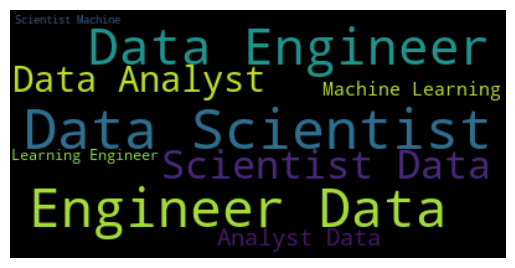

In [11]:
#Wrangling and cleaning for data science job salary 2020-2022
text = " ".join(review for review in Salary.job_title.astype(str))
wcd=wordcloud.WordCloud().generate(text)
print(wcd)

plt.imshow(wcd, interpolation="bilinear")
plt.axis('off')
plt.show()

In [12]:
#Wrangling and cleaning for data science job salary 2020-202
Salary.loc[Salary['job_title'].astype("str").str.contains("Data Scien"), 'job_title'] = "Data Scientist"
Salary.loc[Salary['job_title'].astype("str").str.contains("Data Eng", "Developer"), 'job_title']= "Data Engineer"
Salary.loc[Salary['job_title'].astype("str").str.contains("Analy"), 'job_title'] = "Data Analyst"
Salary.loc[Salary['job_title'].astype("str").str.contains("Machine Learning"), 'job_title'] = "Machine Learning Engineer"
Salary.loc[Salary["job_title"].astype("str").str.contains('Data Scientist|Data Engineer|Data Analyst|Machine Learning')==False, 'job_title']="other"
display(Salary,"Clean data for data science job salary")

Unnamed: 0  work_year experience_level employment_type  \
0             0       2020               MI              FT   
1             1       2020               SE              FT   
2             2       2020               SE              FT   
3             3       2020               MI              FT   
4             4       2020               SE              FT   
..          ...        ...              ...             ...   
602         602       2022               SE              FT   
603         603       2022               SE              FT   
604         604       2022               SE              FT   
605         605       2022               SE              FT   
606         606       2022               MI              FT   

                     job_title  salary salary_currency  salary_in_usd  \
0               Data Scientist   70000             EUR          79833   
1    Machine Learning Engineer  260000             USD         260000   
2                Data Engineer   85000             GBP         109024   
3                 Data Analyst   20000             USD          20000   
4    Machine Learning Engineer  150000             USD         150000   
..                         ...     ...             ...            ...   
602              Data Engineer  154000             USD         154000   
603              Data Engineer  126000             USD         126000   
604               Data Analyst  129000             USD         129000   
605               Data Analyst  150000             USD         150000   
606                      other  200000             USD         200000   

    employee_residence  remote_ratio company_location company_size  
0                   DE             0               DE            L  
1                   JP             0               JP            S  
2                   GB            50               GB            M  
3                   HN             0               HN            S  
4                   US            50               US            L  
..                 ...           ...              ...          ...  
602                 US           100               US            M  
603                 US           100               US            M  
604                 US             0               US            M  
605                 US           100               US            M  
606                 IN           100               US            L  

[607 rows x 12 columns]

'Clean data for data science job salary'

In [75]:

#Wrangling and cleaning for STEM data
df_ds=stem[stem.title.str.contains('Data',case=False)]
df_ml=stem[stem.title.str.contains('Engineer',case=False)]

df_ml.loc[df_ml['tag'].astype("str").str.contains("ML"), 'tag'] = "Machine Learning Engineer"
df_ml.loc[df_ml["tag"].astype("str").str.contains('Machine Learning Engineer')==False, 'tag']="other"
df_ml = df_ml.drop(df_ml[df_ml.tag ==  "other"].index)

df_ds = df_ds[df_ds['tag'].notnull()].copy()
df_ds['tag'] = df_ds['tag'].str.lower()
#df_ds['tag'] = df_ds['tag'].str.lower()
df_ds.loc[df_ds['tag'].astype("str").str.contains("machine","ml"), 'tag'] = "Machine Learning Engineer"
df_ds.loc[df_ds['tag'].astype("str").str.contains("ai","nlp"), 'tag'] = "Machine Learning Engineer"
df_ds.loc[df_ds["tag"].astype("str").str.contains("Machine Learning Engineer")==False, 'tag']="Data Scientist"

dfus = pd.concat([df_ds, df_ml], axis=0)
#display(dfus.shape)
dfus.drop('title', axis=1, inplace=True)  
dfus.rename({'tag':'job_title'}, axis=1, inplace = True)
#display(dfus["job_title"].value_counts())

title = dfus.pop('job_title')
dfus.insert(2, 'job_title', title)

In [76]:
#Wrangling and cleaning for STEM data
# Create country,state,city columns
dfus[['city','state','country']] = dfus.location.str.split(", ",expand=True,n=2)
dfus.country.fillna('United States',inplace=True)
#dfus['city_id'] = sdf.agg(lambda df: f"{df['city']}_{df['country']}",axis = 1)

dfus.head(5)
#display(dfus["city"].value_counts())
display(dfus["country"].value_counts())

#keeps only US data
dfus=dfus.drop(dfus[dfus['country'] != "United States"].index) 
dfus=dfus.drop(dfus[dfus['state'] == "Israel"].index) 

#Date time 
dfus['timestamp'] = pd.to_datetime(dfus['timestamp']).dt.date

United States           4720
India                    160
United Kingdom           107
Canada                    99
Germany                   42
Singapore                 37
Russia                    33
Israel                    28
Switzerland               25
Netherlands               22
Taiwan                    20
China                     15
Ireland                    7
Australia                  7
Ukraine                    6
Sweden                     6
Japan                      5
France                     5
Spain                      5
Luxembourg                 4
Poland                     4
United Arab Emirates       3
Hong Kong (SAR)            3
Italy                      2
Korea, South               2
Brazil                     1
Austria                    1
Serbia                     1
Estonia                    1
Belarus                    1
Name: country, dtype: int64

In [77]:
display(dfus.head())
display(dfus["job_title"].value_counts())
display(dfus["country"].value_counts())
display(dfus.shape)
title_ds = dfus[dfus["job_title"] == "Data Scientist"]
title_ml = dfus[dfus["job_title"] == "Machine Learning Engineer"]
display(title_ds.shape)
display(title_ml.shape)

timestamp    company                  job_title   level  \
419  2018-06-05   LinkedIn             Data Scientist  Senior   
440  2018-06-08  Microsoft  Machine Learning Engineer      64   
454  2018-06-10    Twitter  Machine Learning Engineer   Staff   
499  2018-06-17     Amazon  Machine Learning Engineer      L5   
509  2018-06-20  Microsoft  Machine Learning Engineer      65   

     totalyearlycompensation           location  yearsofexperience  \
419                   233000  San Francisco, CA                4.0   
440                   218000        Seattle, WA               11.0   
454                   500000  San Francisco, CA                4.0   
499                   200000        Seattle, WA                3.0   
509                   340000       Bellevue, WA               11.0   

     yearsatcompany  basesalary  stockgrantvalue  ...  Race_Asian Race_White  \
419             0.0    162000.0         220000.0  ...           0          0   
440            11.0    165000.0          28000.0  ...           0          0   
454             4.0    200000.0         280000.0  ...           0          0   
499             0.0    150000.0         105000.0  ...           0          0   
509            11.0    200000.0          80000.0  ...           0          0   

    Race_Two_Or_More  Race_Black  Race_Hispanic  Race  Education  \
419                0           0              0   NaN        NaN   
440                0           0              0   NaN        NaN   
454                0           0              0   NaN        NaN   
499                0           0              0   NaN        NaN   
509                0           0              0   NaN        NaN   

              city  state        country  
419  San Francisco     CA  United States  
440        Seattle     WA  United States  
454  San Francisco     CA  United States  
499        Seattle     WA  United States  
509       Bellevue     WA  United States  

[5 rows x 31 columns]

Machine Learning Engineer    3464
Data Scientist               1255
Name: job_title, dtype: int64

United States    4719
Name: country, dtype: int64

(4719, 31)

(1255, 31)

(3464, 31)

In [78]:


#Wrangling and cleaning for Kaggle survey data 2021
display(dataset.head(),"Raw Data Kaggle 2021 survey")
display(dataset.tail())
display(dataset.describe(), "Statistical Information from Raw Data")
#for col in dataset.columns:
   # print(col + ": " + str(dataset[col].dtype)) #checking date types
    
#Q3 countries
#Q5 Job Title
#Q7 Skills
#Q2 is gender
#Q24 Salary

Unnamed: 0  Time from Start to Finish (seconds)     Q1   Q2  \
0           1                               289287  30-34  Man   
1           2                                  860  35-39  Man   
2           3                                  507  30-34  Man   
3           8                                  762  35-39  Man   
4          11                                  742  35-39  Man   

                         Q3                 Q4                  Q5  \
0  United States of America    Master’s degree       Data Engineer   
1                 Argentina  Bachelor’s degree   Software Engineer   
2  United States of America    Master’s degree      Data Scientist   
3                   Germany    Doctoral degree      Data Scientist   
4  United States of America    Doctoral degree  Research Scientist   

            Q6 Q7_Part_1 Q7_Part_2  ... Q35_B_Part_2 Q35_B_Part_3  \
0   5-10 years    Python         R  ...          NaN          NaN   
1  10-20 years       NaN       NaN  ...          NaN          NaN   
2   5-10 years    Python       NaN  ...          NaN          NaN   
3   5-10 years    Python       NaN  ...          NaN          NaN   
4    1-2 years       NaN         R  ...          NaN          NaN   

  Q35_B_Part_4 Q35_B_Part_5 Q35_B_Part_6 Q35_B_Part_7 Q35_B_Part_8  \
0          NaN          NaN          NaN          NaN          NaN   
1          NaN          NaN          NaN          NaN          NaN   
2          NaN          NaN          NaN          NaN          NaN   
3          NaN          NaN          NaN          NaN          NaN   
4          NaN          NaN          NaN          NaN          NaN   

  Q35_B_Part_9 Q35_B_Part_10 Q35_B_OTHER  
0          NaN           NaN         NaN  
1          NaN          None         NaN  
2          NaN           NaN         NaN  
3          NaN           NaN         NaN  
4          NaN           NaN         NaN  

[5 rows x 356 columns]

'Raw Data Kaggle 2021 survey'

Unnamed: 0  Time from Start to Finish (seconds)     Q1   Q2        Q3  \
10724       20024                                 2104  35-39  Man  Malaysia   
10725       20029                                 5461  35-39  Man  Thailand   
10726       20033                                  238  30-34  Man    Brazil   
10727       20034                                  625  22-24  Man     India   
10728       20035                                 1031  22-24  Man  Pakistan   

                           Q4                         Q5           Q6  \
10724  I prefer not to answer  Machine Learning Engineer    1-2 years   
10725       Bachelor’s degree                      Other  10-20 years   
10726         Master’s degree         Research Scientist    < 1 years   
10727       Bachelor’s degree          Software Engineer    3-5 years   
10728         Master’s degree  Machine Learning Engineer    < 1 years   

      Q7_Part_1 Q7_Part_2  ...        Q35_B_Part_2 Q35_B_Part_3 Q35_B_Part_4  \
10724    Python       NaN  ...                 NaN          NaN          NaN   
10725       NaN       NaN  ...                 NaN          NaN          NaN   
10726    Python       NaN  ...                 NaN          NaN          NaN   
10727    Python       NaN  ...   Weights & Biases           NaN          NaN   
10728    Python       NaN  ...   Weights & Biases           NaN          NaN   

        Q35_B_Part_5 Q35_B_Part_6 Q35_B_Part_7 Q35_B_Part_8 Q35_B_Part_9  \
10724   TensorBoard           NaN          NaN      Trains           NaN   
10725            NaN          NaN          NaN          NaN          NaN   
10726            NaN          NaN          NaN          NaN          NaN   
10727   TensorBoard           NaN          NaN      Trains           NaN   
10728            NaN          NaN          NaN      Trains           NaN   

      Q35_B_Part_10 Q35_B_OTHER  
10724           NaN         NaN  
10725          None         NaN  
10726           NaN         NaN  
10727           NaN         NaN  
10728           NaN         NaN  

[5 rows x 356 columns]

Unnamed: 0  Time from Start to Finish (seconds)            Q24
count  10729.000000                         1.072900e+04   10729.000000
mean   10057.796719                         9.587565e+03   48777.239258
std     5781.445851                         6.518651e+04   69458.784233
min        1.000000                         1.070000e+02    1000.000000
25%     5060.000000                         5.470000e+02    2000.000000
50%    10115.000000                         7.440000e+02   20000.000000
75%    15079.000000                         1.165000e+03   70000.000000
max    20035.000000                         1.104261e+06  500000.000000

'Statistical Information from Raw Data'

In [63]:
df_needinfo = pd.DataFrame(columns = []) # new data frame to have all needed data

gender = dataset['Q2'].astype('string')
country  = dataset['Q3'].astype('string')
JobTitle = dataset['Q5'].astype('string')
Salary = dataset['Q24'].astype('float64')
coding_experence = dataset['Q6'].astype('string')


#change dtypes
python = dataset['Q7_Part_1'].astype('string')
R = dataset['Q7_Part_2'].astype('string')
SQL = dataset['Q7_Part_3'].astype('string')
C = dataset['Q7_Part_4'].astype('string')
C_pp = dataset['Q7_Part_5'].astype('string')
Java = dataset['Q7_Part_6'].astype('string')
Javascript = dataset['Q7_Part_7'].astype('string')
Julia = dataset['Q7_Part_8'].astype('string')
Swift = dataset['Q7_Part_9'].astype('string')
Bash = dataset['Q7_Part_10'].astype('string')
MATLAB = dataset['Q7_Part_11'].astype('string')
none = dataset['Q7_Part_12'].astype('string')
Other = dataset['Q7_OTHER'].astype('string')


#display(dataset.head())
#for col in dataset.columns:
    #print(col + ": " + str(dataset[col].dtype))

#insert needed data to new data frame
df_needinfo.insert(0, column = 'Gender', value = gender)
df_needinfo.insert(1, column = 'Country', value = country)
df_needinfo.insert(2, column = 'Job Title', value = JobTitle)
df_needinfo.insert(3, column = 'Salary', value = Salary)
df_needinfo.insert(4, column = 'Python', value = python)
df_needinfo.insert(5, column = 'R', value = R)
df_needinfo.insert(6, column = 'SQL', value = SQL)
df_needinfo.insert(7, column = 'C', value = C)
df_needinfo.insert(8, column = 'C++', value = C_pp)
df_needinfo.insert(9, column = 'Java', value = Java)
df_needinfo.insert(10, column = 'Javascript', value = Javascript)
df_needinfo.insert(11, column = 'Julia', value = Julia)
df_needinfo.insert(12, column = 'Swift', value = Swift)
df_needinfo.insert(13, column = 'Bash', value = Bash)
df_needinfo.insert(14, column = 'MATLAB', value = MATLAB)
df_needinfo.insert(15, column = 'None', value = none)
df_needinfo.insert(16, column = 'Other', value = Other)
df_needinfo.insert(17, column = 'Coding Experience', value = coding_experence)



display(df_needinfo.head(10), "Clean Data")
display(df_needinfo.tail(10), "Clean Data")


#Pie chart "Proportions of Job Titles of Total 20000 People"
survey_title=df_needinfo["Job Title"]
number_of_title=pd.DataFrame(survey_title.value_counts())
number_of_title





#men and women average salary world vs Canada


group_csg=df_needinfo.filter(items=['Country', 'Salary','Gender'])#put 'Country', 'Salary', 'Gender' together
display(group_csg.tail(10))

group_csg['canada'] = group_csg['Country'] == 'Canada'

grouped_multiple = group_csg.groupby(['canada', 'Gender']).agg({'Salary': ['mean']})
display(group_csg.head(10))
display(grouped_multiple,"annual mean Salary by country and gender ")



#differnet coding experence average salary 
group_code=df_needinfo.filter(items=['Coding Experience', 'Salary'])#put 'Country', 'Salary', 'Gender' together
display(group_csg.tail(10),"data frame with coding experience and salary")

#group_csg['canada'] = group_csg['Country'] == 'Canada'

mean_coding = group_code.groupby(['Coding Experience']).agg({'Salary': ['mean']})
mean_coding.sort_values( by="Coding Experience",ascending=False)
display(group_code.head(10),"Salary by Coding experience")
display(mean_coding,"mean salary of each coding experience")

Gender                   Country                Job Title    Salary  Python  \
0    Man  United States of America            Data Engineer  125000.0  Python   
1    Man                 Argentina        Software Engineer   20000.0    <NA>   
2    Man  United States of America           Data Scientist  150000.0  Python   
3    Man                   Germany           Data Scientist   80000.0  Python   
4    Man  United States of America       Research Scientist   40000.0    <NA>   
5    Man                    Canada            Data Engineer  100000.0  Python   
6    Man               Switzerland                    Other   80000.0  Python   
7  Woman                     India             Statistician    2000.0    <NA>   
8    Man                    Russia           Data Scientist    1000.0  Python   
9  Woman                    Canada  Product/Project Manager  150000.0  Python   

      R   SQL     C   C++  Java  Javascript Julia Swift  Bash  MATLAB  None  \
0     R   SQL  <NA>  <NA>  <NA>        <NA>  <NA>  <NA>  <NA>    <NA>  <NA>   
1  <NA>  <NA>  <NA>  <NA>  Java  Javascript  <NA>  <NA>  Bash    <NA>  <NA>   
2  <NA>   SQL  <NA>  <NA>  <NA>        <NA>  <NA>  <NA>  Bash    <NA>  <NA>   
3  <NA>   SQL  <NA>  <NA>  <NA>        <NA>  <NA>  <NA>  Bash    <NA>  <NA>   
4     R  <NA>  <NA>  <NA>  <NA>        <NA>  <NA>  <NA>  <NA>    <NA>  <NA>   
5  <NA>   SQL  <NA>  <NA>  <NA>        <NA>  <NA>  <NA>  <NA>  MATLAB  <NA>   
6     R  <NA>  <NA>  <NA>  <NA>        <NA>  <NA>  <NA>  <NA>    <NA>  <NA>   
7     R   SQL  <NA>   C++  <NA>        <NA>  <NA>  <NA>  <NA>    <NA>  <NA>   
8  <NA>   SQL  <NA>  <NA>  <NA>        <NA>  <NA>  <NA>  <NA>    <NA>  <NA>   
9  <NA>  <NA>  <NA>  <NA>  <NA>        <NA>  <NA>  <NA>  <NA>    <NA>  <NA>   

  Other Coding Experience  
0  <NA>        5-10 years  
1  <NA>       10-20 years  
2  <NA>        5-10 years  
3  <NA>        5-10 years  
4  <NA>         1-2 years  
5  <NA>         < 1 years  
6  <NA>         < 1 years  
7  <NA>         3-5 years  
8  <NA>         < 1 years  
9  <NA>         1-2 years

'Clean Data'

Gender    Country                  Job Title   Salary  \
10719                Man    Nigeria  Machine Learning Engineer   2000.0   
10720                Man      Italy  Machine Learning Engineer  70000.0   
10721                Man  Indonesia             Data Scientist  15000.0   
10722  Prefer not to say    Germany         Research Scientist   1000.0   
10723                Man     Brazil         Research Scientist  10000.0   
10724                Man   Malaysia  Machine Learning Engineer   3000.0   
10725                Man   Thailand                      Other  20000.0   
10726                Man     Brazil         Research Scientist   1000.0   
10727                Man      India          Software Engineer   1000.0   
10728                Man   Pakistan  Machine Learning Engineer   1000.0   

       Python     R   SQL     C   C++  Java  Javascript  Julia Swift  Bash  \
10719    <NA>  <NA>  <NA>  <NA>  <NA>  Java        <NA>   <NA>  <NA>  Bash   
10720  Python  <NA>   SQL     C   C++  Java  Javascript   <NA>  <NA>  <NA>   
10721  Python  <NA>   SQL  <NA>  <NA>  <NA>        <NA>   <NA>  <NA>  Bash   
10722  Python  <NA>  <NA>  <NA>  <NA>  <NA>  Javascript   <NA>  <NA>  <NA>   
10723  Python     R  <NA>     C  <NA>  <NA>        <NA>  Julia  <NA>  <NA>   
10724  Python  <NA>  <NA>  <NA>   C++  <NA>        <NA>   <NA>  <NA>  <NA>   
10725    <NA>  <NA>   SQL     C  <NA>  <NA>        <NA>   <NA>  <NA>  <NA>   
10726  Python  <NA>  <NA>  <NA>  <NA>  <NA>        <NA>   <NA>  <NA>  <NA>   
10727  Python  <NA>   SQL     C  <NA>  Java  Javascript   <NA>  <NA>  <NA>   
10728  Python  <NA>  <NA>  <NA>  <NA>  <NA>        <NA>   <NA>  <NA>  <NA>   

       MATLAB  None  Other Coding Experience  
10719    <NA>  <NA>   <NA>         1-2 years  
10720  MATLAB  <NA>  Other         20+ years  
10721    <NA>  <NA>   <NA>         1-2 years  
10722    <NA>  <NA>   <NA>       10-20 years  
10723  MATLAB  <NA>   <NA>        5-10 years  
10724    <NA>  <NA>   <NA>         1-2 years  
10725    <NA>  <NA>   <NA>       10-20 years  
10726    <NA>  <NA>   <NA>         < 1 years  
10727    <NA>  <NA>   <NA>         3-5 years  
10728    <NA>  <NA>   <NA>         < 1 years

'Clean Data'

Country   Salary             Gender
10719    Nigeria   2000.0                Man
10720      Italy  70000.0                Man
10721  Indonesia  15000.0                Man
10722    Germany   1000.0  Prefer not to say
10723     Brazil  10000.0                Man
10724   Malaysia   3000.0                Man
10725   Thailand  20000.0                Man
10726     Brazil   1000.0                Man
10727      India   1000.0                Man
10728   Pakistan   1000.0                Man

Country    Salary Gender  canada
0  United States of America  125000.0    Man   False
1                 Argentina   20000.0    Man   False
2  United States of America  150000.0    Man   False
3                   Germany   80000.0    Man   False
4  United States of America   40000.0    Man   False
5                    Canada  100000.0    Man    True
6               Switzerland   80000.0    Man   False
7                     India    2000.0  Woman   False
8                    Russia    1000.0    Man   False
9                    Canada  150000.0  Woman    True

Salary
                                         mean
canada Gender                                
False  Man                       50168.024323
       Nonbinary                110050.000000
       Prefer not to say         65189.922481
       Prefer to self-describe   50217.391304
       Woman                     35590.687766
True   Man                       83301.282051
       Prefer not to say          8000.000000
       Woman                     70362.500000

'annual mean Salary by country and gender '

Country   Salary             Gender  canada
10719    Nigeria   2000.0                Man   False
10720      Italy  70000.0                Man   False
10721  Indonesia  15000.0                Man   False
10722    Germany   1000.0  Prefer not to say   False
10723     Brazil  10000.0                Man   False
10724   Malaysia   3000.0                Man   False
10725   Thailand  20000.0                Man   False
10726     Brazil   1000.0                Man   False
10727      India   1000.0                Man   False
10728   Pakistan   1000.0                Man   False

'data frame with coding experience and salary'

Coding Experience    Salary
0        5-10 years  125000.0
1       10-20 years   20000.0
2        5-10 years  150000.0
3        5-10 years   80000.0
4         1-2 years   40000.0
5         < 1 years  100000.0
6         < 1 years   80000.0
7         3-5 years    2000.0
8         < 1 years    1000.0
9         1-2 years  150000.0

'Salary by Coding experience'

Salary
                                   mean
Coding Experience                      
1-2 years                  25577.830189
10-20 years                76981.518817
20+ years                  96516.143106
3-5 years                  37647.094926
5-10 years                 57979.484482
< 1 years                  24568.696331
I have never written code  27934.937611

'mean salary of each coding experience'

## Question 1. How is the annual salary affected by the factors in our dataset? 
We can analyze salary based on the trend from 2020 to 2022, experience levels and job titles. Some data information:  
- work_year: the year the salary was paid  
- job_title: the role worked in during the year  
- experience_level: the experience level in the job during the year  
- remote_ratio: the overall amount of work done remotely
- company_location: the country of the employer's main office or contracting branch as an ISO 3166 country code

We will be focusing on the salary to do visualizations:
- Average Annual Salary by Years
- Rank top 5 jobs. Which job title has more occurrences in the dataset.
- Compare of Average Annual Salary for 5 Most familiar Jobs

In [13]:
salaries=Salary[["salary_in_usd", "work_year", "experience_level", "job_title", "remote_ratio", "company_location"]]
salaries.head()

salary_in_usd  work_year experience_level                  job_title  \
0          79833       2020               MI             Data Scientist   
1         260000       2020               SE  Machine Learning Engineer   
2         109024       2020               SE              Data Engineer   
3          20000       2020               MI               Data Analyst   
4         150000       2020               SE  Machine Learning Engineer   

   remote_ratio company_location  
0             0               DE  
1             0               JP  
2            50               GB  
3             0               HN  
4            50               US

In [15]:
year=salaries.groupby("work_year").mean("salary_in_usd").drop(["remote_ratio"], axis=1)
display(year,"2020-2022 with Salary In USD")

salary_in_usd
work_year               
2020        95813.000000
2021        99853.792627
2022       124522.006289

'2020-2022 with Salary In USD'

<AxesSubplot:xlabel='work_year'>

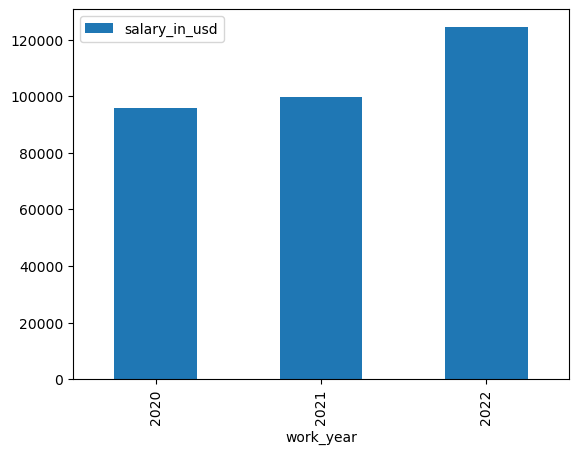

In [16]:
year.plot.bar()


- The average salary in the past three years showed an upward trend, especially increased in 2022  
- The pandemic in 2020 did not affect the rapid development of data science  
- In 2022, the average salary is over 12,000 USD, which tells us that data job is well-paid

#### Job Title and Annual Salary
Different job titles have different content work. We think the analysis of job titles as a primary value will bring us more insights. While the data science industry is developing, many specialized job titles related to data have also been born. Therefore, we will choose a few of the most representative job titles to do our analysis.

In [18]:
title=salaries["job_title"]
title_count=pd.DataFrame(title.value_counts())
display(title_count,"Job title with number of peope")

job_title
Data Scientist                   192
Data Engineer                    158
Data Analyst                     135
Machine Learning Engineer         62
other                             60

'Job title with number of peope'

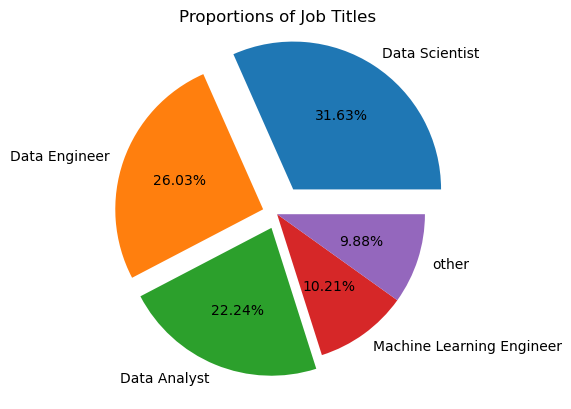

In [19]:
plt.pie(x=title_count["job_title"], 
        autopct='%.2f%%',
        labels=["Data Scientist", "Data Engineer", "Data Analyst", "Machine Learning Engineer", "other"],
        explode=(0.2, 0.1, 0.1, 0, 0)
       )
plt.title("Proportions of Job Titles")
plt.show()

The pie chart shows that "Data Scientist" has the largest share in the job_title, then the order is "Data Engineer", "Data Analyst", "Machine Learning Engineer" and "Other". 

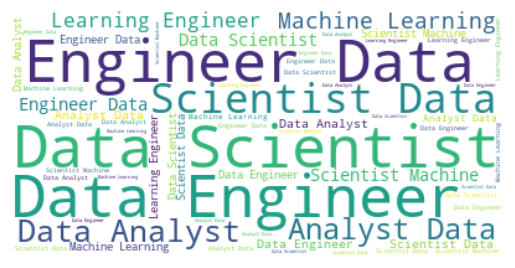

In [20]:
text_job = " ".join(job for job in salaries.job_title.astype(str))
wcd_clean=wordcloud.WordCloud(background_color='white', repeat=True).generate(text_job)
print(wcd_clean)

plt.imshow(wcd_clean, interpolation="bilinear")
plt.axis('off')
plt.show()

Obviously the top 4 job title shown in this word cloud are Data Engineer, Data Scientist, Data Analyst and Machine Learning Engineer.

<AxesSubplot:title={'center':'Histogram of Mean Saylary of Different Jobs'}, ylabel='job_title,work_year'>

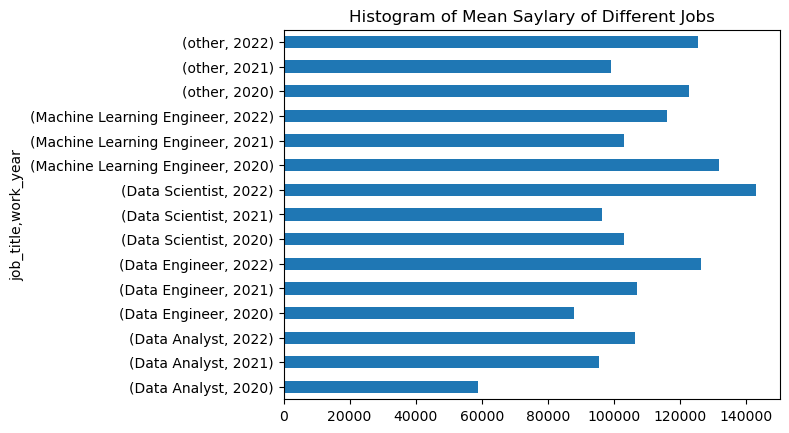

In [21]:
jobtitle=pd.DataFrame(salaries.groupby(["job_title", "work_year"])["salary_in_usd"].mean())
jobtitle["salary_in_usd"].plot.barh(title="Histogram of Mean Saylary of Different Jobs")

From our visualizations, all data-related occupations will continue to grow in wages in 2022 compared to before. So we can think that the average salary for data science-related work will continue to increase in the next year.

In [26]:
#type(jobtitle)

In [27]:
jobtitle=jobtitle.reset_index()
jobtitle

index                  job_title  work_year  salary_in_usd
0       0               Data Analyst       2020   58838.692308
1       1               Data Analyst       2021   95445.171429
2       2               Data Analyst       2022  106201.126437
3       3              Data Engineer       2020   87943.833333
4       4              Data Engineer       2021  106982.640000
5       5              Data Engineer       2022  126284.711111
6       6             Data Scientist       2020  102948.178571
7       7             Data Scientist       2021   96321.364865
8       8             Data Scientist       2022  142908.466667
9       9  Machine Learning Engineer       2020  131779.125000
10     10  Machine Learning Engineer       2021  103130.846154
11     11  Machine Learning Engineer       2022  115897.071429
12     12                      other       2020  122772.400000
13     13                      other       2021   99043.031250
14     14                      other       2022  125478.086957

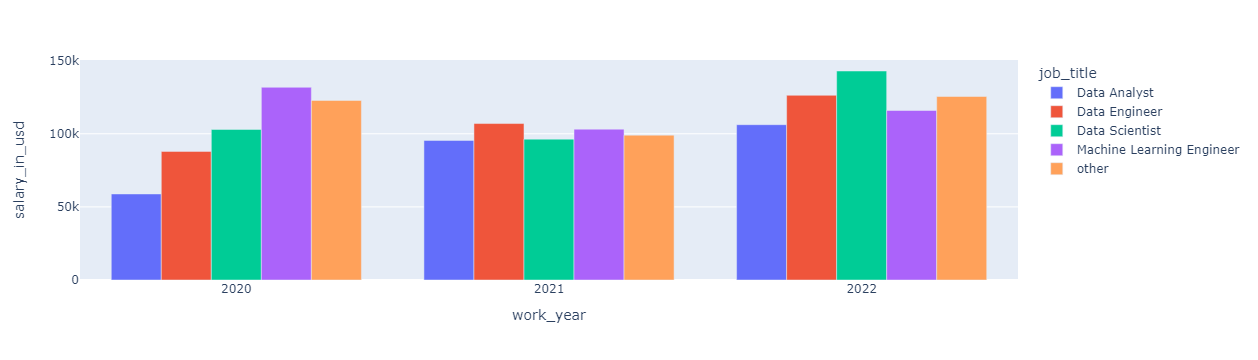

In [28]:
fig_job=px.bar(jobtitle,
           x="work_year",
           y="salary_in_usd",
           color="job_title",
           barmode="group"
          )
fig_job.show()

All careers' mean annual salaries are over 10,000 USD except data analyst, which is around 99000 USD annually, and the most well-paid job is Data scientist, its yearly salary is very close to 12,000 USD; the rest annual salary is both between 11,000 to 12,000 USD. Overall, these top jobs in data science are all high-wage due to the heavy demand for talent.

#### Remote Ratio and Annual Salary(employees can make thier choise)
Since the epidemic in 2020, many companies have begun to implement the work-from-home model. Even after the epidemic has been dramatically alleviated, many companies are still allowing employees to work from home or hybrid. By visualizing the information from the dataset, we can explore the relationship between working from home and annual income and whether this working pattern has a significant effect on wages.

In [29]:
remote=salaries.groupby(["remote_ratio", "work_year"]).mean("salary_in_usd")
remote=remote.reset_index()
remote

remote_ratio  work_year  salary_in_usd
0             0       2020   95210.000000
1             0       2021   91630.823529
2             0       2022  114915.884615
3            50       2020   77591.238095
4            50       2021   78750.848485
5            50       2022   97875.666667
6           100       2020  106693.611111
7           100       2021  114147.598291
8           100       2022  129210.750000

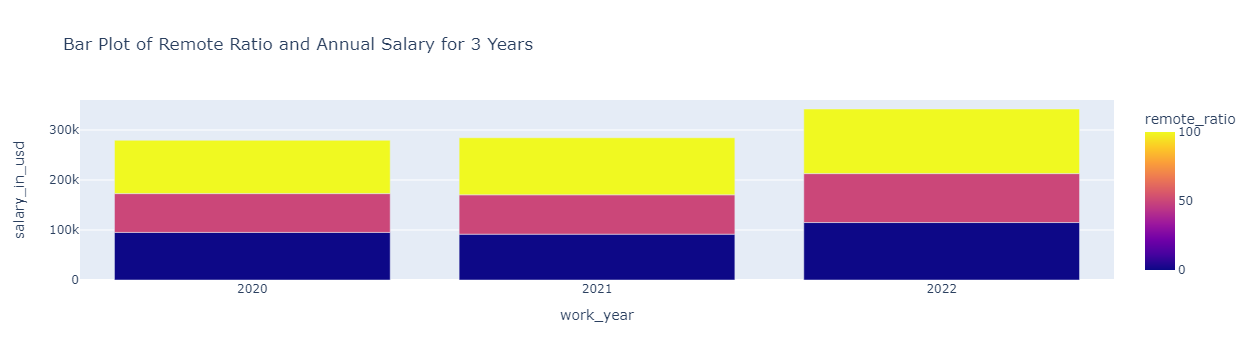

In [30]:
fig_remote=px.bar(remote, 
                  x="work_year", 
                  y="salary_in_usd", 
                  color="remote_ratio",
                  title="Bar Plot of Remote Ratio and Annual Salary for 3 Years",
                  barmode="group"
                   )
fig_remote.show()

From 2020 to 2022, the average annual salary of 100% home office is the highest, followed by full on-site office, and the lowest is the hybrid office, which is significantly lower than the other two modes. We can infer that maybe working from home is more productive, and some people are more comfortable with the traditional way of working, but the hybrid model can lead to inefficiencies and lower annual salaries than the other models.

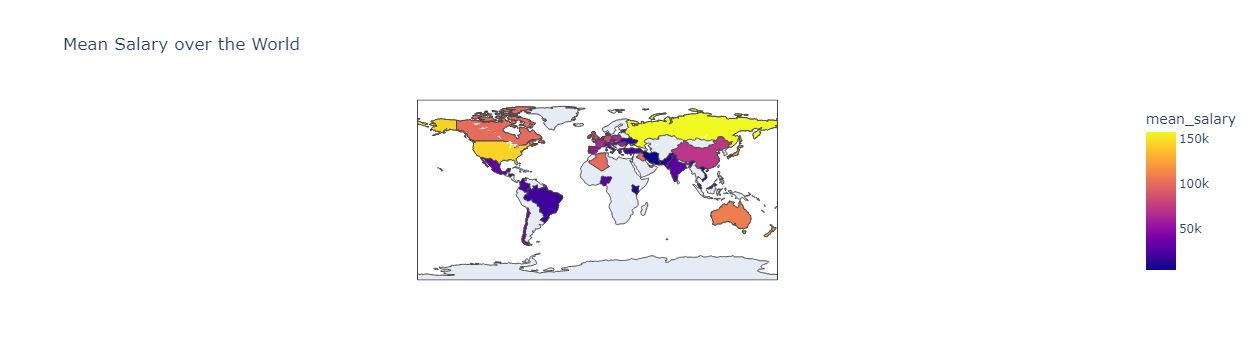

In [32]:
#Make a worldmap to show the average salary all over the world, before doing that, we need to change the ISO-3166-2 format country code to ISO-3166-3 format.
#First grouby the dataset by the company location and find the mean salaries for each location
salary_location=Salary.groupby("company_location").agg(
    mean_salary=('salary_in_usd', 'mean'), count_jobs=('company_location', 'count')
).reset_index()

#Create a list to store the ISO-3166-3 format country code
iso3_country=[]
for country in salary_location['company_location']:
    c_name=countries.get(country)
    iso3_country.append(c_name[2])

#Add the IOS3166-3 country codes to the groupby dataframe as a column   
salary_location['iso_alpha']=iso3_country

#Plot the map with mean salaries for each location
fig_salary_world= px.choropleth(salary_location, locations="iso_alpha",      
                    color="mean_salary", 
                    hover_data=["mean_salary", "count_jobs"],
                    title="Mean Salary over the World",
                    color_continuous_scale=px.colors.sequential.Plasma)

# if there is error show that "salary_location_df" in the above fig_salary_world function, please change "salary_location_df" to "salary_location" 
#somehow it can not be saved
fig_salary_world.show()

From this heatmap, we can see that the most well-paid location is Malaysia which is around 200,000 USD annually. The second country is America, where the annual salary is between 150,000 to 200,000 USD per year. The annual salary of all other countries recorded in our dataset is distributed from 0 to 100,000 USD. For Canada, the average salary from 2020 to 2022 for all respondents is 105,7500 annually, which is the top 4 well-paid country.

#### Experience Level and Annual Salary
Next, we can consider the relationship between experience level and annual salary. Salary will increase naturally every year with the employee's working hours. This growth will also vary with job level. When an employee is only entry-level, his salary must not be higher than that of an expert-level employee. But how much does this experience level affect salary?

In [33]:
explevel=pd.DataFrame(salaries.groupby(["experience_level", "work_year"])["salary_in_usd"].mean())
explevel

salary_in_usd
experience_level work_year               
EN               2020        63648.600000
                 2021        59101.021277
                 2022        65423.428571
EX               2020       202416.500000
                 2021       223752.727273
                 2022       178313.846154
MI               2020        85950.062500
                 2021        85490.088889
                 2022        91193.956044
SE               2020       137240.500000
                 2021       126596.188406
                 2022       143043.398964

In [34]:
exp_level=salaries["experience_level"]
level_count=pd.DataFrame(exp_level.value_counts())
level_count.reindex(["EX", "SE", "MI", "EN"])

experience_level
EX                26
SE               280
MI               213
EN                88

In [35]:
explevel=pd.DataFrame(salaries.groupby(["experience_level", "work_year"])["salary_in_usd"].mean())
explevel

salary_in_usd
experience_level work_year               
EN               2020        63648.600000
                 2021        59101.021277
                 2022        65423.428571
EX               2020       202416.500000
                 2021       223752.727273
                 2022       178313.846154
MI               2020        85950.062500
                 2021        85490.088889
                 2022        91193.956044
SE               2020       137240.500000
                 2021       126596.188406
                 2022       143043.398964

<AxesSubplot:ylabel='experience_level,work_year'>

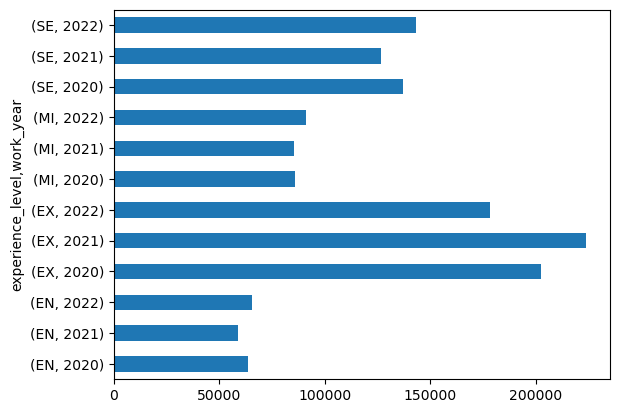

In [36]:
explevel=salaries.groupby(["experience_level", "work_year"]).mean("salary")
explevel=explevel.drop(["remote_ratio"], axis=1)
explevel["salary_in_usd"].plot.barh()

We got very similar results as predicted. That is, the average annual salary of the expert level will be the highest of all. And it can be seen that the annual salary will gradually increase according to your proficiency. This also reflects the importance of work experience in data science employment.

In [38]:
explevel=explevel.reset_index()
explevel

experience_level  work_year  salary_in_usd
0                EN       2020   63648.600000
1                EN       2021   59101.021277
2                EN       2022   65423.428571
3                EX       2020  202416.500000
4                EX       2021  223752.727273
5                EX       2022  178313.846154
6                MI       2020   85950.062500
7                MI       2021   85490.088889
8                MI       2022   91193.956044
9                SE       2020  137240.500000
10               SE       2021  126596.188406
11               SE       2022  143043.398964

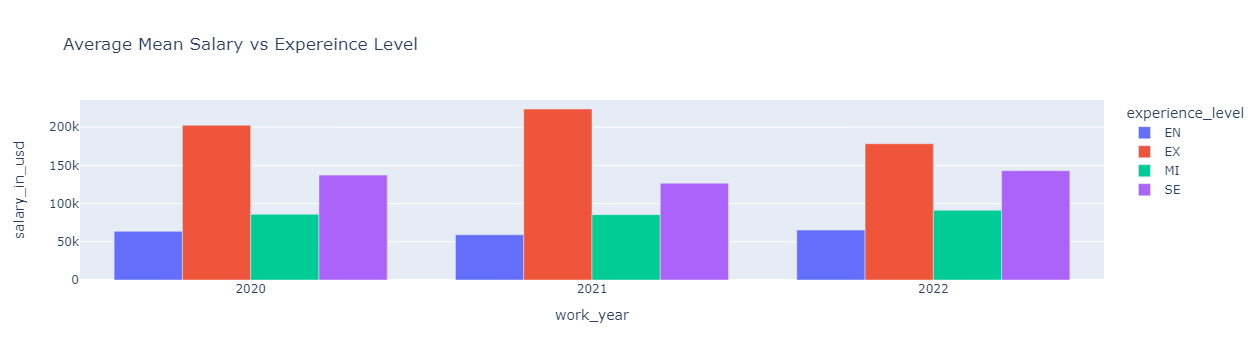

In [39]:
fig_exp=px.bar(explevel,
           x="work_year",
           y="salary_in_usd",
           title="Average Mean Salary vs Expereince Level",
           color="experience_level",
           barmode="group"
          )
fig_exp.show()

It is obvious that the people who are expert level in their job earn the most annual salary, which is over 20,000 USD in 2020 and 2021. However, it has decreased to 17,8000 USD in 2022. All other three groups' annual salaries decreased in 2021 and rose in 2022 but without a big change compared to 2020.

In [ ]:
df_needinfo['canada'] = df_needinfo['Country'] == 'Canada'
temp = df_needinfo.groupby('canada')['Gender'].value_counts().to_frame()
temp.columns = ['amount']
temp = temp.reset_index(drop = False)
temp = temp.pivot(index = 'canada', columns='Gender')['amount']

temp['all'] = temp.sum(axis = 1)
plt.rcParams.update({'font.size' : 14})
for c in temp.columns:
    temp[c] = temp[c] / temp['all'] * 100

temp = temp.drop('all', axis = 1)
width = 0.5

f, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (6, 6))
ax.bar(['Rest of World', 'Canada'], temp['Man'].values, 
       width, label = 'Men', color = ['skyblue', 'skyblue'], alpha = 0.3)
ax.bar(['Rest of World', 'Canada'], temp['Woman'].values, width, 
       bottom = temp['Man'].values, label = 'Women', color = ['red', 'red'], alpha = 0.3)

#print(temp['Man'].values)
#print(temp['Woman'].values)

ax.annotate('18.8 %', [-0.06, 87], fontsize=15)
ax.annotate('21.3 %', [1-0.06, 87], fontsize=15)

ax.set_ylabel('Percentage (%)')
ax.set_title('Comparison of Gender Distribution 2021')
ax.legend(loc='lower center')

plt.show()

This graph shows the comparison between gender distributions of Canada and the rest of world in the data science field in 2021. The blue color represents male, and the red color represents female. We can see that there are 71.2% of male works in the data science field. Only 18.8% of people are female. However, in Canada, the percentage of females increased to 21.3%. The total number difference between men and women is very significant.

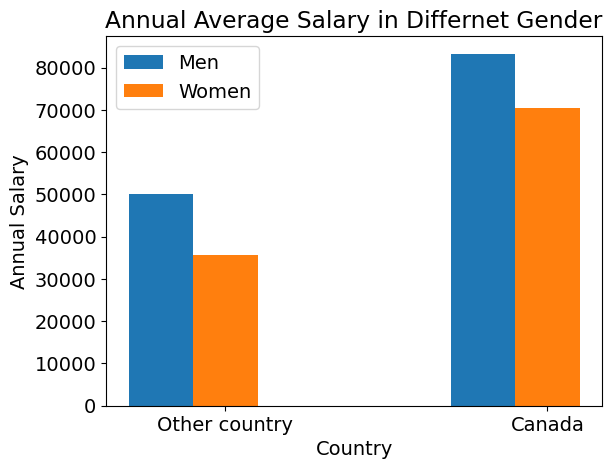

In [80]:
width=0.2
a=grouped_multiple.iloc[[0,5]]["Salary"]["mean"]
b=grouped_multiple.iloc[[4,7]]["Salary"]["mean"]
x = np.arange(2)
plt.bar(x-0.2,a, width)
plt.bar(x,b, width)
plt.xticks(x, ["Other country", 'Canada'])
#plt.figure(x+0.2, y2, width)
plt.xlabel("Country") 
plt.ylabel("Annual Salary")
plt.title("Annual Average Salary in Differnet Gender")
plt.legend(["Men","Women"])

From the above "Annual Average Salary in Differnet Gender" graph, we can see the annual average in salary between Canada and other countries are almost the same. In the chart, the male is getting a higher salary. Males get 15000 USD higher than women in other countries, and in Canada, people get a 13000 USD difference between men and women. We can say that there is no gap in annual average salary between different gender. However, we know from the previous graph there is a 3% difference in gender distribution.
Since there is no gap between men and women, we can conclude that the annual salary is from the above "Annual Average Salary in Different Gender" graph, we can see the annual average salary between Canada and other countries is almost the same. In the chart, man is getting a high salary. Men get 15000 USD higher than women in other countries, and in Canada, people get a 13000 USD difference between men and women. We can say that there is no gap in annual average salary between different gender. However, we know from the previous graph there is a 3% difference in gender distribution.
Since there is no gap between men and women, we can conclude that the annual salary is paid equally between different genders.

In [79]:
#Find the rows of highest annual salary:
highest_salary=salaries.loc[salaries['salary_in_usd'].idxmax()]
highest_salary=pd.DataFrame(highest_salary)
display(highest_salary,'Highest Salary')

252
salary_in_usd            600000
work_year                  2021
experience_level             EX
job_title         Data Engineer
remote_ratio                100
company_location             US

'Highest Salary'

- Through previous visualizations and analysis, data science is still a growing field with economic growth between 2020 and 2022. The position with the highest number of people is data scientist, but the highest-paying positions differ in all three years. As we all know, the higher the experience level, the higher the annual salary. Moreover, due to the covid-19, a 100% remote ratio is the office model with the highest annual salary in 2022.   
- The number of females is low in data science, no matter what country. However, the salary does not effect by gender. It is equally paid to males and females.
- We also found that becoming a data scientist or Data Engineer would be a great idea if you are looking for high-paying jobs.


## Q2. What is the relationship between education and salary in the field of data science in the United States?
 US is the most well-paid country for data science field jobs. We want to use this data set of STEM salary surveys to study employment wages for data scientists in the United States. We decided to investigate the relationship between different levels of education and earnings. We wanted to explore whether master's students in data science have higher salaries and career advancement compared to bachelor's students in order to assess the value of a master's degree for future data science employees.

## Overview of the Data Set

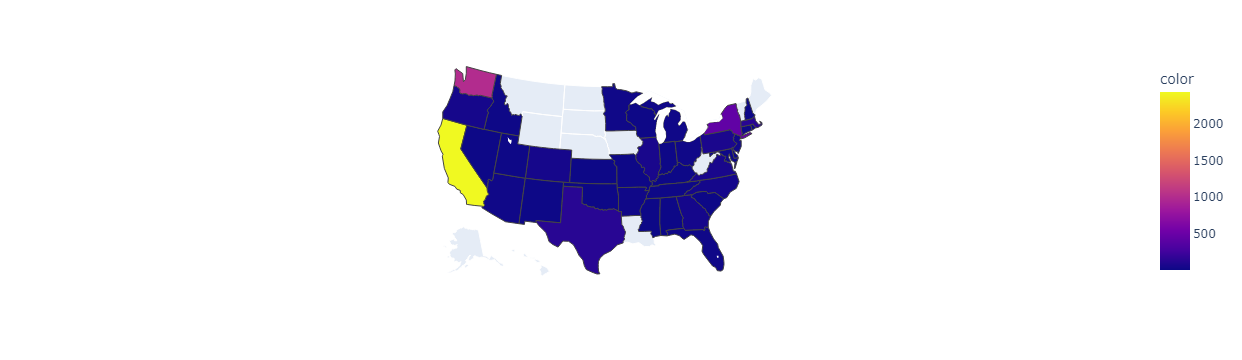

In [44]:
state_jobdf = dfus.groupby(['state'])['state'].count()
fig = px.choropleth(locations=state_jobdf.index, locationmode="USA-states", color=state_jobdf.values, scope="usa")
fig.show()

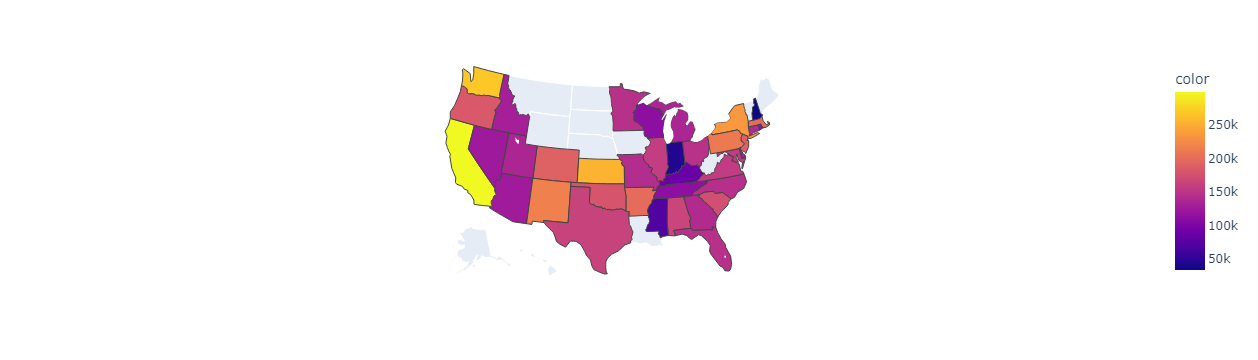

In [45]:
state_df = dfus.groupby(['state'])['totalyearlycompensation'].mean()

fig = px.choropleth(locations=state_jobdf.index, locationmode="USA-states", color=state_df, scope="usa")
fig.show()

The first heat map corresponds to the number of jobs in the US data science field, with lighter colors representing a higher number of jobs. The states with lighter colors have more jobs, and the states with darker colors have fewer jobs. According to the dataset, California has the highest number of jobs of any state in the country, followed by Washington and New York.
The second heat map corresponds to the mean of data science field job's total yearly compensation of each state in the US, with lighter colors representing a higher average annual salary by state.

## Analyze of the education levels distribution of workers in the US in the field of data science
The purpose of this part of analysis is to look at the distribution of employees in the field of data science across different education levels.

In [46]:
display(dfus["Education"].value_counts())

Master's Degree      1281
PhD                   668
Bachelor's Degree     348
Highschool              4
Some College            4
Name: Education, dtype: int64

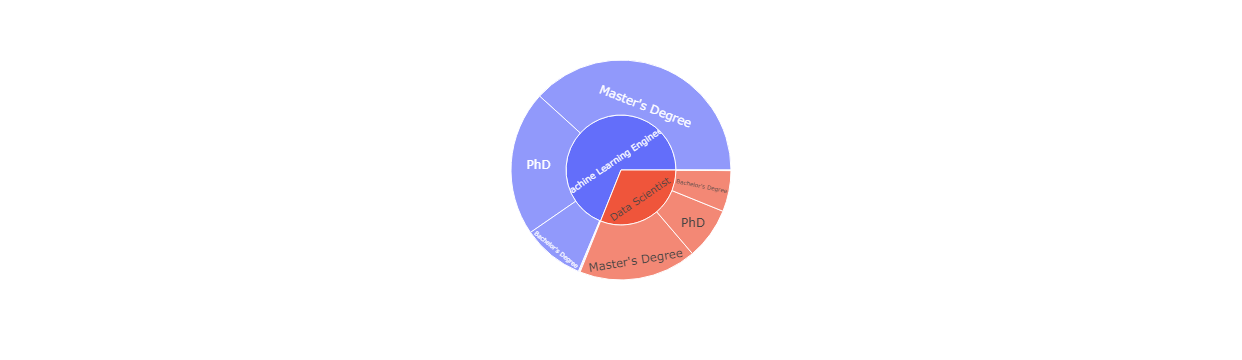

In [47]:
df_educount = dfus.groupby(['Education','job_title'])[['totalyearlycompensation']].count().reset_index()
#Using group by to count the number of jobs each job title has in different levels of education
df_educount.columns = ['Education', 'job_title', 'Count']
#Droping the columns that has not use of this part of analysis.
fig = px.sunburst(df_educount, path=['job_title', 'Education'], values='Count')
fig.show()
#Showing the overview of the education distribution in data field.

This sunburst plot gives us a general idea of the distribution of education in the field of data science employment. More than half of the data science workforce has a master's degree. The proportion of a Ph.D. is larger than a bachelor's degree in the field of data science in the US.

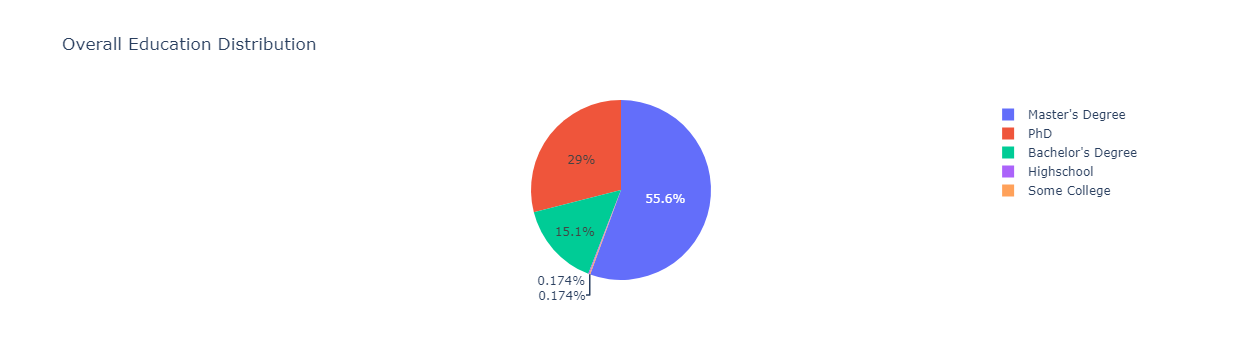

In [48]:
fig1 = px.pie(dfus, values = dfus['Education'].value_counts().values, title='Overall Education Distribution',names = dfus['Education'].value_counts().index)
fig1.show()

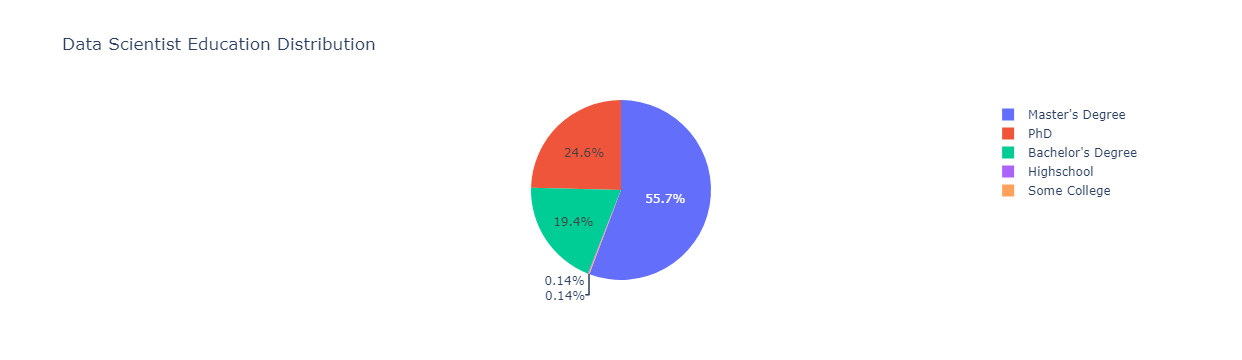

In [49]:
fig2 = px.pie(title_ds, values = title_ds['Education'].value_counts().values, title='Data Scientist Education Distribution',names = title_ds['Education'].value_counts().index)
fig2.show()

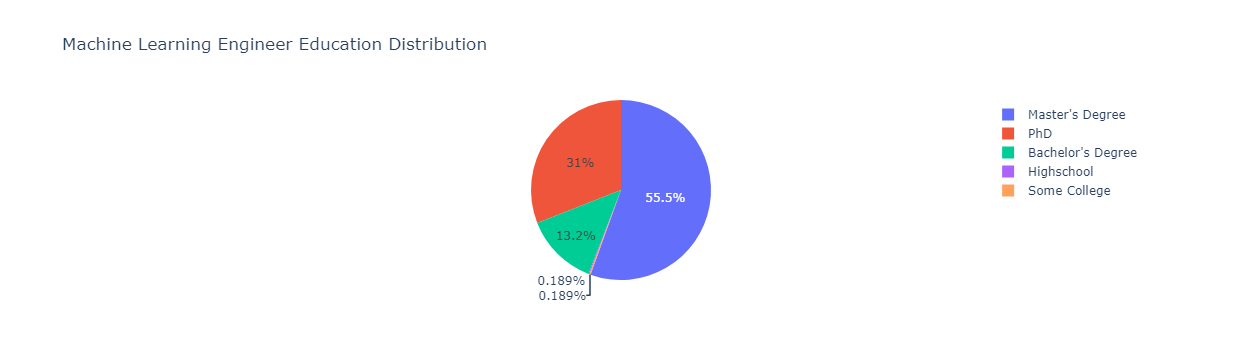

In [50]:
fig3 = px.pie(title_ml, values = title_ml['Education'].value_counts().values, title='Machine Learning Engineer Education Distribution',names = title_ml['Education'].value_counts().index)
fig3.show()

- Overall, the vast majority of data science employees hold at least a bachelor's degree, with 55.6% holding a master's, 29% holding a Ph.D., and 15.1% holding a Bachelor's Degree. Only a tiny minority (0.348%) have less than a bachelor's degree.
- For Data Scientists, 55% of the workers have a Master's Degree, 24.6% hold a Ph.D., and 19.4% hold a Bachelor's. Only 2 Data Scientists have less than a bachelor's degree.
- For Machine Learning Engineers, only 13.2% of them are bachelor's degrees. The percentage of engineers with a bachelor's degree is significantly lower than that of data scientists. Almost one-third of machine learning engineers have a Ph.D. The proportion of workers with Ph.D. degrees has increased compared to data scientists. The percentage of machine learning engineers with master's degrees is similar to that of data scientists.     
In conclusion, this set of charts reflects that a data science field job requires a bachelor's degree or higher. The proportion of employees who have a bachelor's degree is the lowest. More than half of the employees in the data science field have a graduate degree. There are higher educational requirements for engineers than for data scientists.

## Analyze the difference in salary between Master's degree and Bachelor's degree
We looked at the difference in salary between a Master's Degree and Bachelor's Degree by using box plots and density plots.

In [51]:
dfbachelor = dfus[dfus['Bachelors_Degree'] == 1]
dfmaster = dfus[dfus['Masters_Degree'] == 1]
dfbachelor_ds = title_ds[title_ds['Bachelors_Degree'] == 1]
dfmaster_ds = title_ds[title_ds['Masters_Degree'] == 1]
dfbachelor_ml = title_ml[title_ml['Bachelors_Degree'] == 1]
dfmaster_ml = title_ml[title_ml['Masters_Degree'] == 1]

Education                  job_title  Count
0  Bachelor's Degree             Data Scientist    139
1  Bachelor's Degree  Machine Learning Engineer    209
4    Master's Degree             Data Scientist    399
5    Master's Degree  Machine Learning Engineer    882

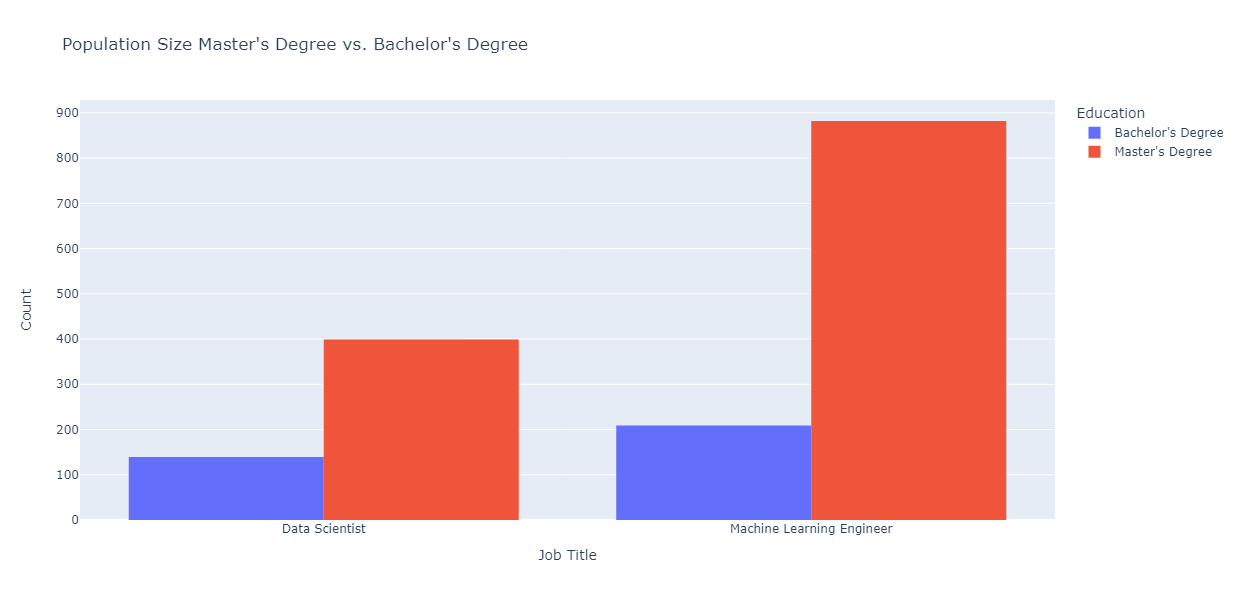

In [52]:
df_edu_bm = df_educount[df_educount["Education"].isin([ "Master\'s Degree", "Bachelor\'s Degree"])] #keep only Master and bechelo
display(df_edu_bm)
fig = px.histogram(df_edu_bm, x="job_title", y="Count",
             color='Education', barmode='group',
             height=600,title="Population Size Master's Degree vs. Bachelor's Degree").update_layout(
    xaxis_title="Job Title", yaxis_title="Count"
)
fig.show()

In [53]:
display(dfbachelor.basesalary.describe())
display(dfmaster.basesalary.describe())

count       349.000000
mean     142813.753582
std       45545.193357
min       13000.000000
25%      115000.000000
50%      139000.000000
75%      165000.000000
max      450000.000000
Name: basesalary, dtype: float64

count      1281.000000
mean     158038.251366
std       47560.858428
min       38000.000000
25%      130000.000000
50%      151000.000000
75%      179000.000000
max      650000.000000
Name: basesalary, dtype: float64

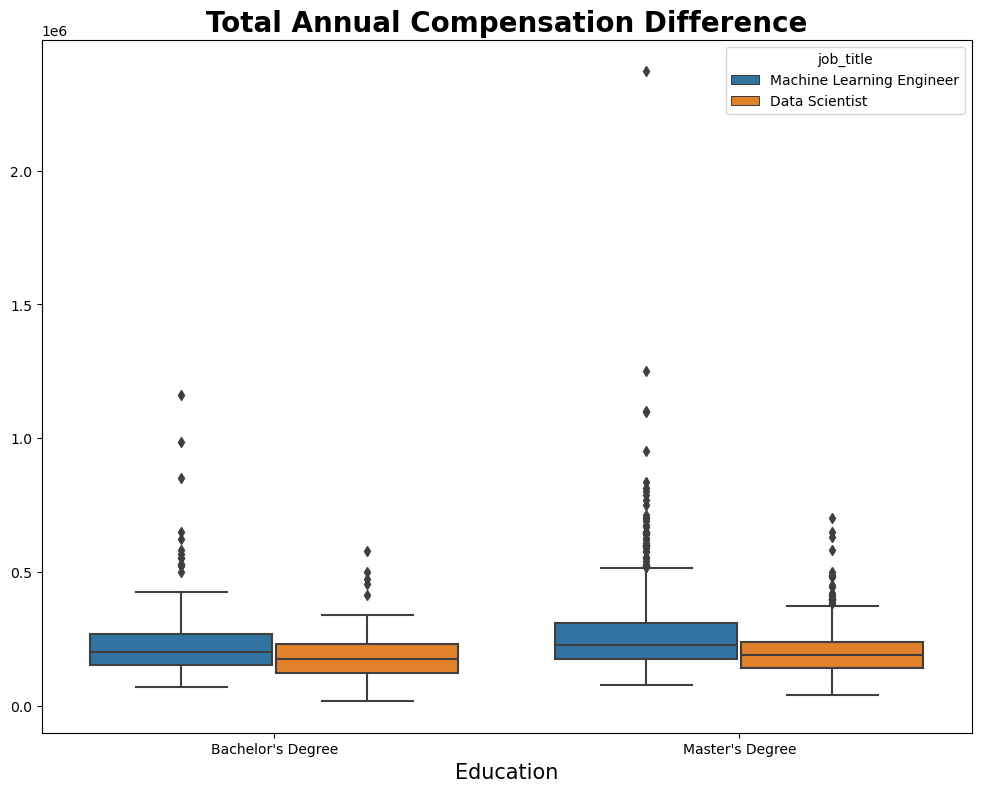

In [54]:
df_mb = pd.concat([dfbachelor, dfmaster], axis=0)
plt.figure(figsize=(12,9))
ax = sns.boxplot(y="totalyearlycompensation", x="Education", data=df_mb, hue = "job_title", orient = "v", showfliers = True)
ax.set_title("Total Annual Compensation Difference", fontweight="bold", color="black", fontsize=20)
ax.set_xlabel('Education', fontsize=15)
ax.set_ylabel('');

plt.show()

This set of box plots is challenging to analyze visually due to the interference of outliers. Master's degrees have more outliers above the 100th percentile, which may mean that master's employees have more opportunities to have extremely high salaries, although these outliers are not statistically significant.

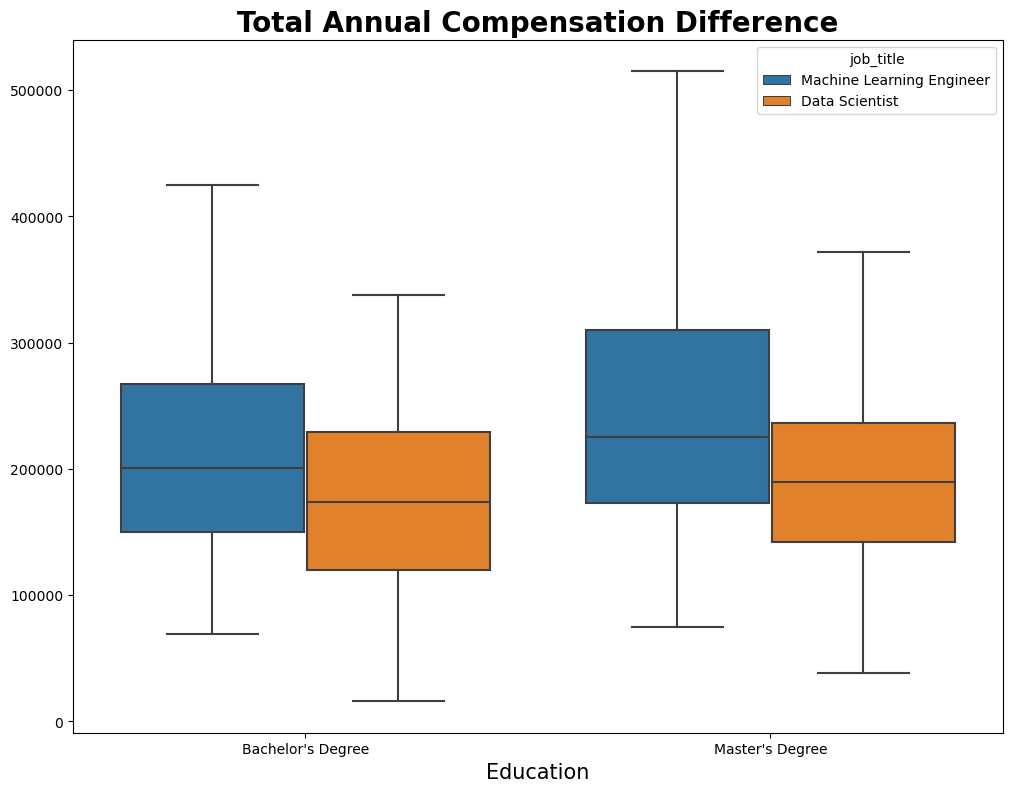

In [55]:
df_mb = pd.concat([dfbachelor, dfmaster], axis=0)
plt.figure(figsize=(12,9))
ax = sns.boxplot(y="totalyearlycompensation", x="Education", data=df_mb, hue = "job_title", orient = "v", showfliers = False)
ax.set_title("Total Annual Compensation Difference", fontweight="bold", color="black", fontsize=20)
ax.set_xlabel('Education', fontsize=15)
ax.set_ylabel('');

plt.show()

After filtering for outliers, the box plot demonstrates that, for both Machine Learning Engineer and Data Scientist positions, the median salary is higher for those with a master's degree than those with a bachelor's degree. For the engineer's graph, the first and third quartiles of the master's degree are higher than those of the bachelor's degree. For the machine learning engineer's graph, the first and third quartiles of the master's degree are higher than those of the bachelor's degree. For the data scientist's plot, the first quartile of the master's degree is higher than the bachelor's degree. However, their third quartile appears to be similar.

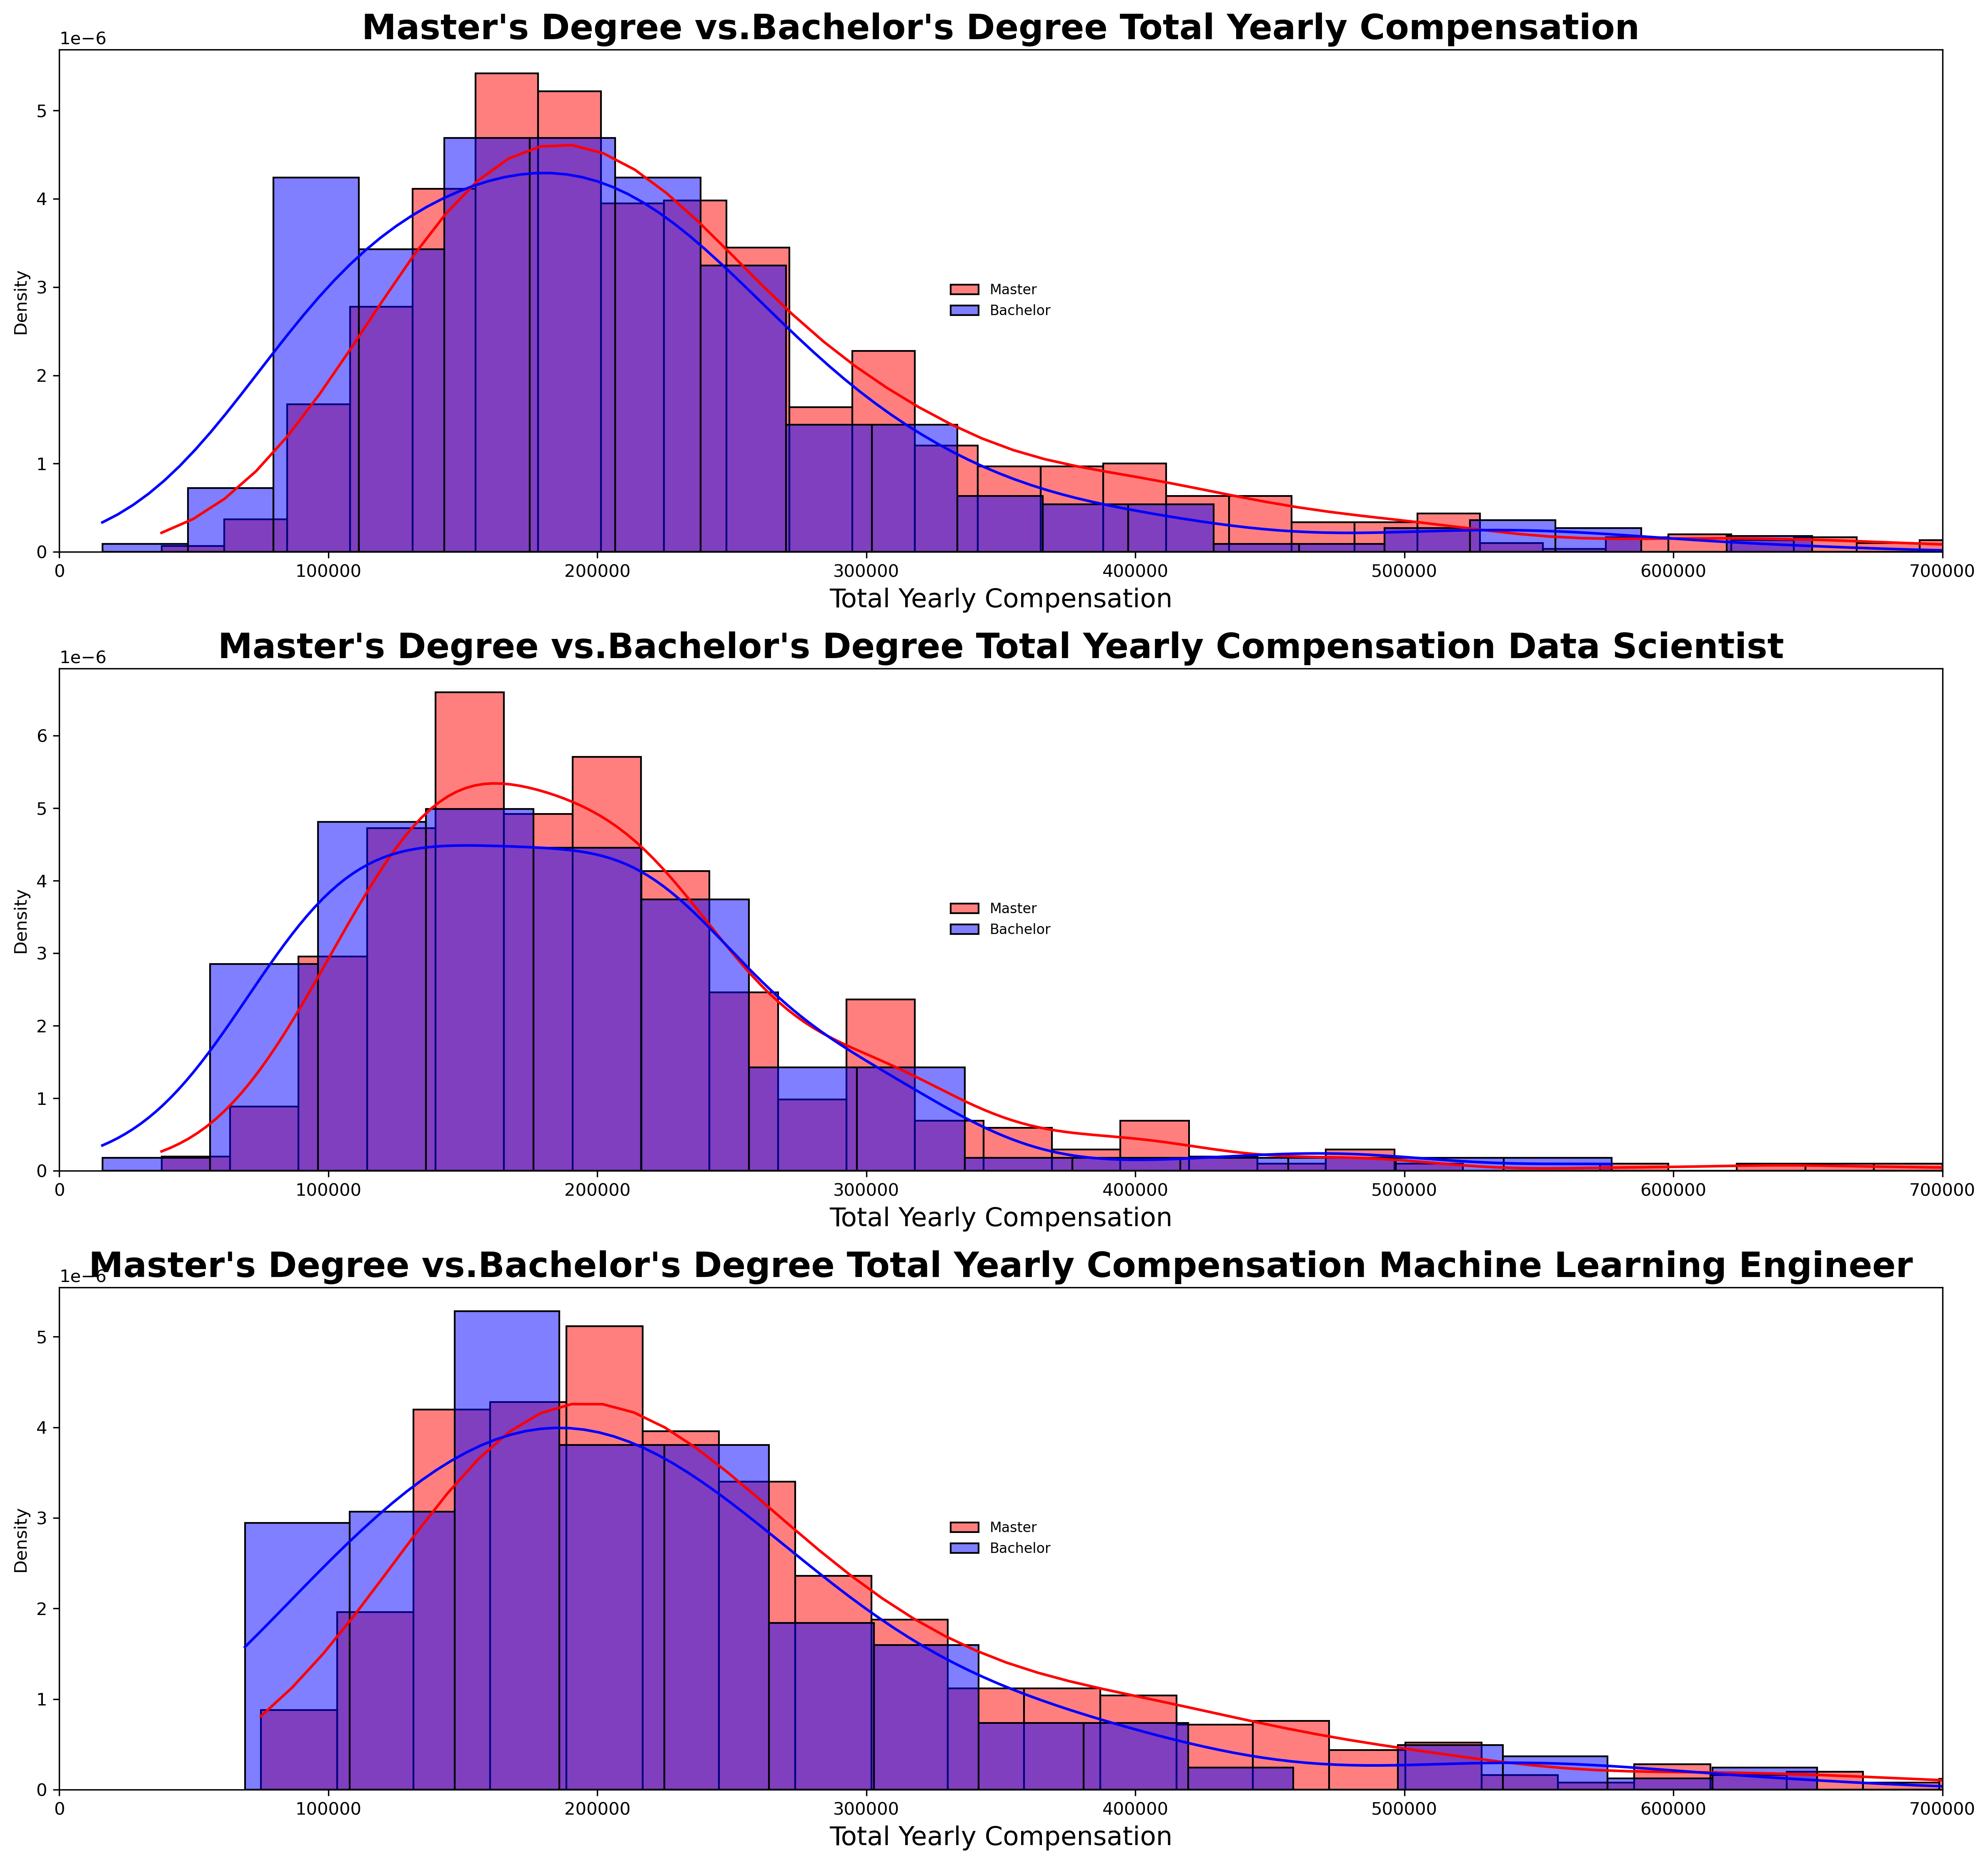

In [56]:

#Density Plots
fig, (ax1,ax3, ax5) = plt.subplots(3, 1, figsize=(16,15), dpi=300)
sns.histplot(dfmaster["totalyearlycompensation"], ax=ax1, color="red",  kde=True, label='Master',stat="density", linewidth=1).set(xlim=(0,700000))
sns.histplot(dfbachelor["totalyearlycompensation"], ax=ax1, color="blue", kde=True, label='Bachelor',stat="density", linewidth=1).set(xlim=(0,700000))
ax1.set_title("Master's Degree vs.Bachelor's Degree Total Yearly Compensation", fontweight="bold", color="black",fontsize=20)
ax1.set_xlabel('Total Yearly Compensation', fontsize=15)

sns.histplot(dfmaster_ds["totalyearlycompensation"], ax=ax3, color="red",  kde=True, label='Master',stat="density", linewidth=1).set(xlim=(0,700000))
sns.histplot(dfbachelor_ds["totalyearlycompensation"], ax=ax3, color="blue", kde=True, label='Bachelor',stat="density", linewidth=1).set(xlim=(0,700000))
ax3.set_title("Master's Degree vs.Bachelor's Degree Total Yearly Compensation Data Scientist", fontweight="bold", color="black", fontsize=20)
ax3.set_xlabel('Total Yearly Compensation', fontsize=15)

sns.histplot(dfmaster_ml["totalyearlycompensation"], ax=ax5, color="red",  kde=True,  label='Master',stat="density", linewidth=1).set(xlim=(0,700000))
sns.histplot(dfbachelor_ml["totalyearlycompensation"], ax=ax5, color="blue", kde=True, label='Bachelor',stat="density", linewidth=1).set(xlim=(0,700000))
ax5.set_title("Master's Degree vs.Bachelor's Degree Total Yearly Compensation Machine Learning Engineer", fontweight="bold", color="black", fontsize=20)
ax5.set_xlabel('Total Yearly Compensation', fontsize=15)


handles, labels = ax1.get_legend_handles_labels()
handles = [h for h, lbl, prev in zip(handles, labels, [None] + labels) if lbl != prev]
ax1.legend(handles=handles, loc="center", fontsize=8, frameon=False)
handles2, labels2 = ax3.get_legend_handles_labels()
handles2 = [h for h, lbl, prev in zip(handles2, labels2, [None] + labels2) if lbl != prev]
ax3.legend(handles=handles2, loc="center", fontsize=8, frameon=False)
handles3, labels3 = ax5.get_legend_handles_labels()
handles3 = [h for h, lbl, prev in zip(handles3, labels3, [None] + labels3) if lbl != prev]
ax5.legend(handles=handles3, loc="center", fontsize=8, frameon=False)

fig.tight_layout()
plt.show()

count       349.000000
mean     142813.753582
std       45545.193357
min       13000.000000
25%      115000.000000
50%      139000.000000
75%      165000.000000
max      450000.000000
Name: basesalary, dtype: float64

count      1281.000000
mean     158038.251366
std       47560.858428
min       38000.000000
25%      130000.000000
50%      151000.000000
75%      179000.000000
max      650000.000000
Name: basesalary, dtype: float64

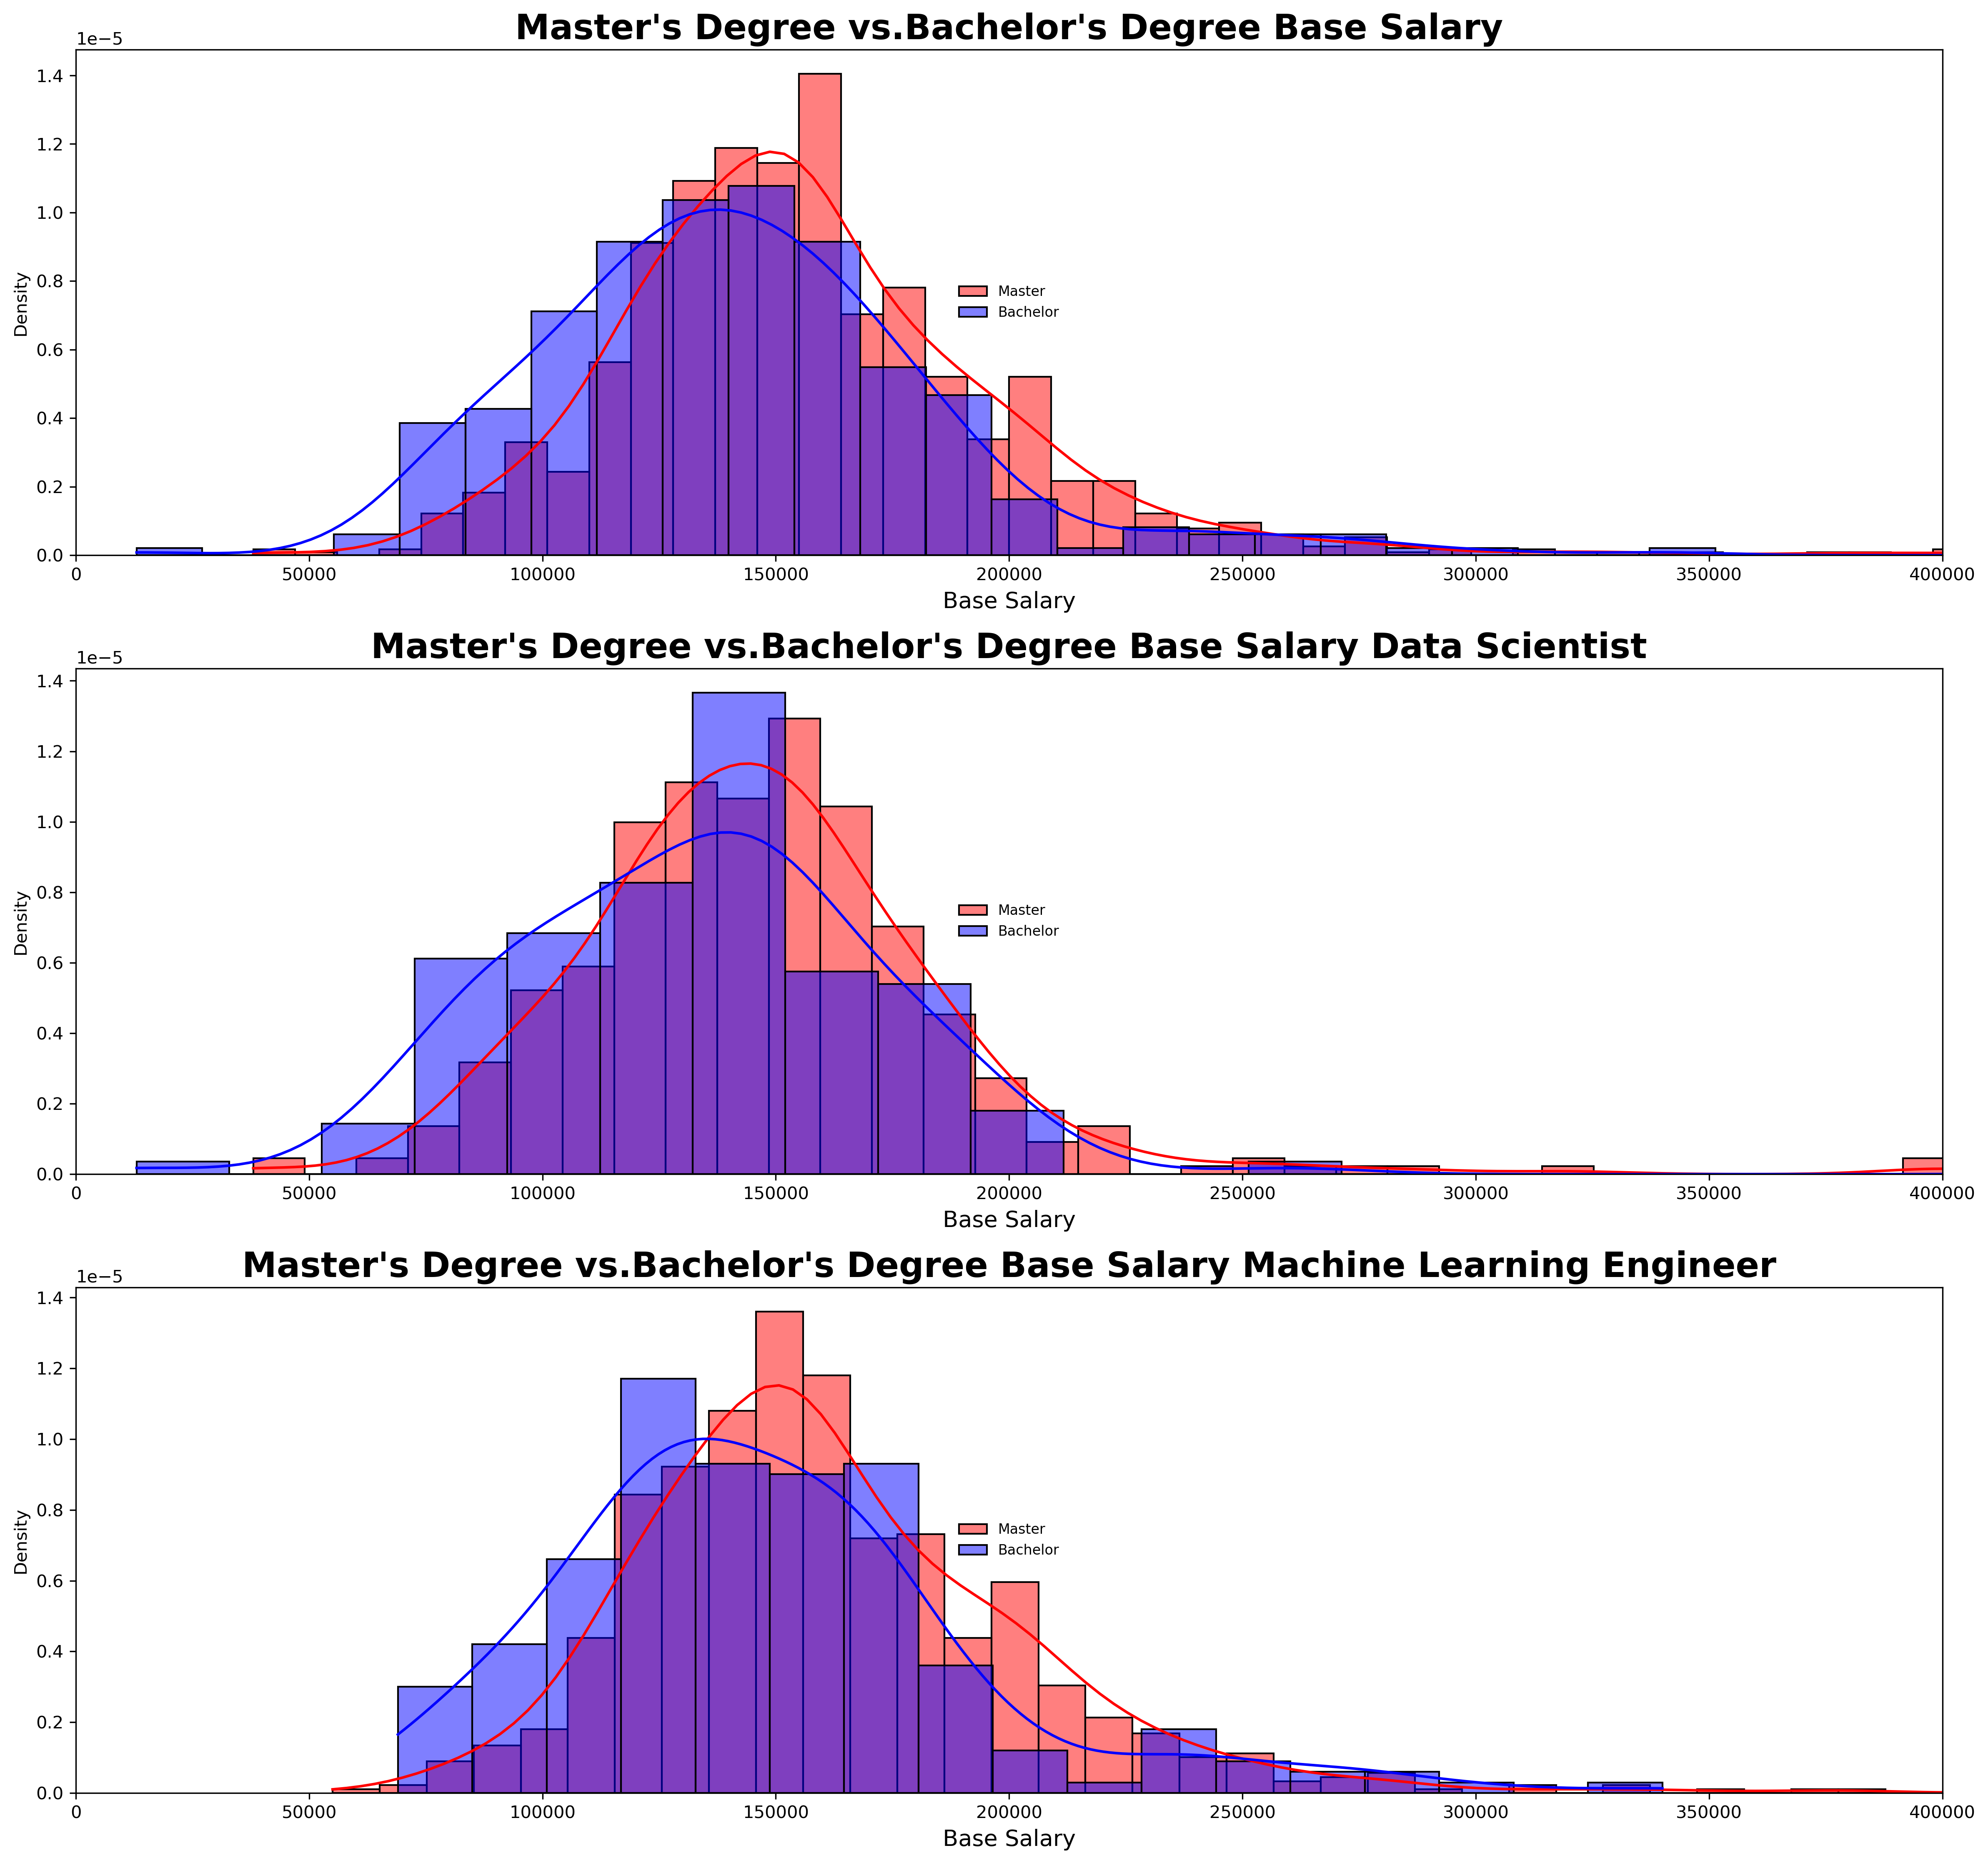

In [57]:
display(dfbachelor.basesalary.describe())
display(dfmaster.basesalary.describe())

fig, (ax1,ax3, ax5) = plt.subplots(3, 1, figsize=(16,15), dpi=300)
sns.histplot(dfmaster["basesalary"], ax=ax1, color="red",  kde=True, stat="density", linewidth=1,label='Master',legend=True).set(xlim=(0,400000))
sns.histplot(dfbachelor["basesalary"], ax=ax1, color="blue", kde=True, stat="density", linewidth=1,label='Bachelor',legend=True).set(xlim=(0,400000))
ax1.set_title("Master's Degree vs.Bachelor's Degree Base Salary", fontweight="bold", color="black", fontsize = 20)
ax1.set_xlabel('Base Salary', fontsize=13)

sns.histplot(dfmaster_ds["basesalary"], ax=ax3,label='Master', color="red",  kde=True, stat="density", linewidth=1).set(xlim=(0,400000))
sns.histplot(dfbachelor_ds["basesalary"], ax=ax3, color="blue", label='Bachelor', kde=True, stat="density", linewidth=1).set(xlim=(0,400000))
ax3.set_title("Master's Degree vs.Bachelor's Degree Base Salary Data Scientist", fontweight="bold", color="black", fontsize = 20)
ax3.set_xlabel('Base Salary', fontsize=13)

sns.histplot(dfmaster_ml["basesalary"], ax=ax5, color="red",  label='Master', kde=True, stat="density", linewidth=1).set(xlim=(0,400000))
sns.histplot(dfbachelor_ml["basesalary"], ax=ax5, color="blue",   label='Bachelor' , kde=True, stat="density", linewidth=1).set(xlim=(0,400000))
ax5.set_title("Master's Degree vs.Bachelor's Degree Base Salary Machine Learning Engineer", fontweight="bold", color="black", fontsize = 20)
ax5.set_xlabel('Base Salary', fontsize=13)


handles, labels = ax1.get_legend_handles_labels()
handles = [h for h, lbl, prev in zip(handles, labels, [None] + labels) if lbl != prev]
ax1.legend(handles=handles, loc="center", fontsize=8, frameon=False)
handles2, labels2 = ax3.get_legend_handles_labels()
handles2 = [h for h, lbl, prev in zip(handles2, labels2, [None] + labels2) if lbl != prev]
ax3.legend(handles=handles2, loc="center", fontsize=8, frameon=False)
handles3, labels3 = ax5.get_legend_handles_labels()
handles3 = [h for h, lbl, prev in zip(handles3, labels3, [None] + labels3) if lbl != prev]
ax5.legend(handles=handles3, loc="center", fontsize=8, frameon=False)

fig.tight_layout()
plt.show()

The density plots show that the base salary and annual total salary distributions for master's degrees have the same standard distribution shape as the distribution for bachelor's degrees, and both have similar differences. Overall the salary distributions for all masters. A more extensive means and a minor variance than the bachelor's distributions. All bachelor's salary distributions perform a left skew. They are more centralized around the mean than master's salary distributions with no skews.

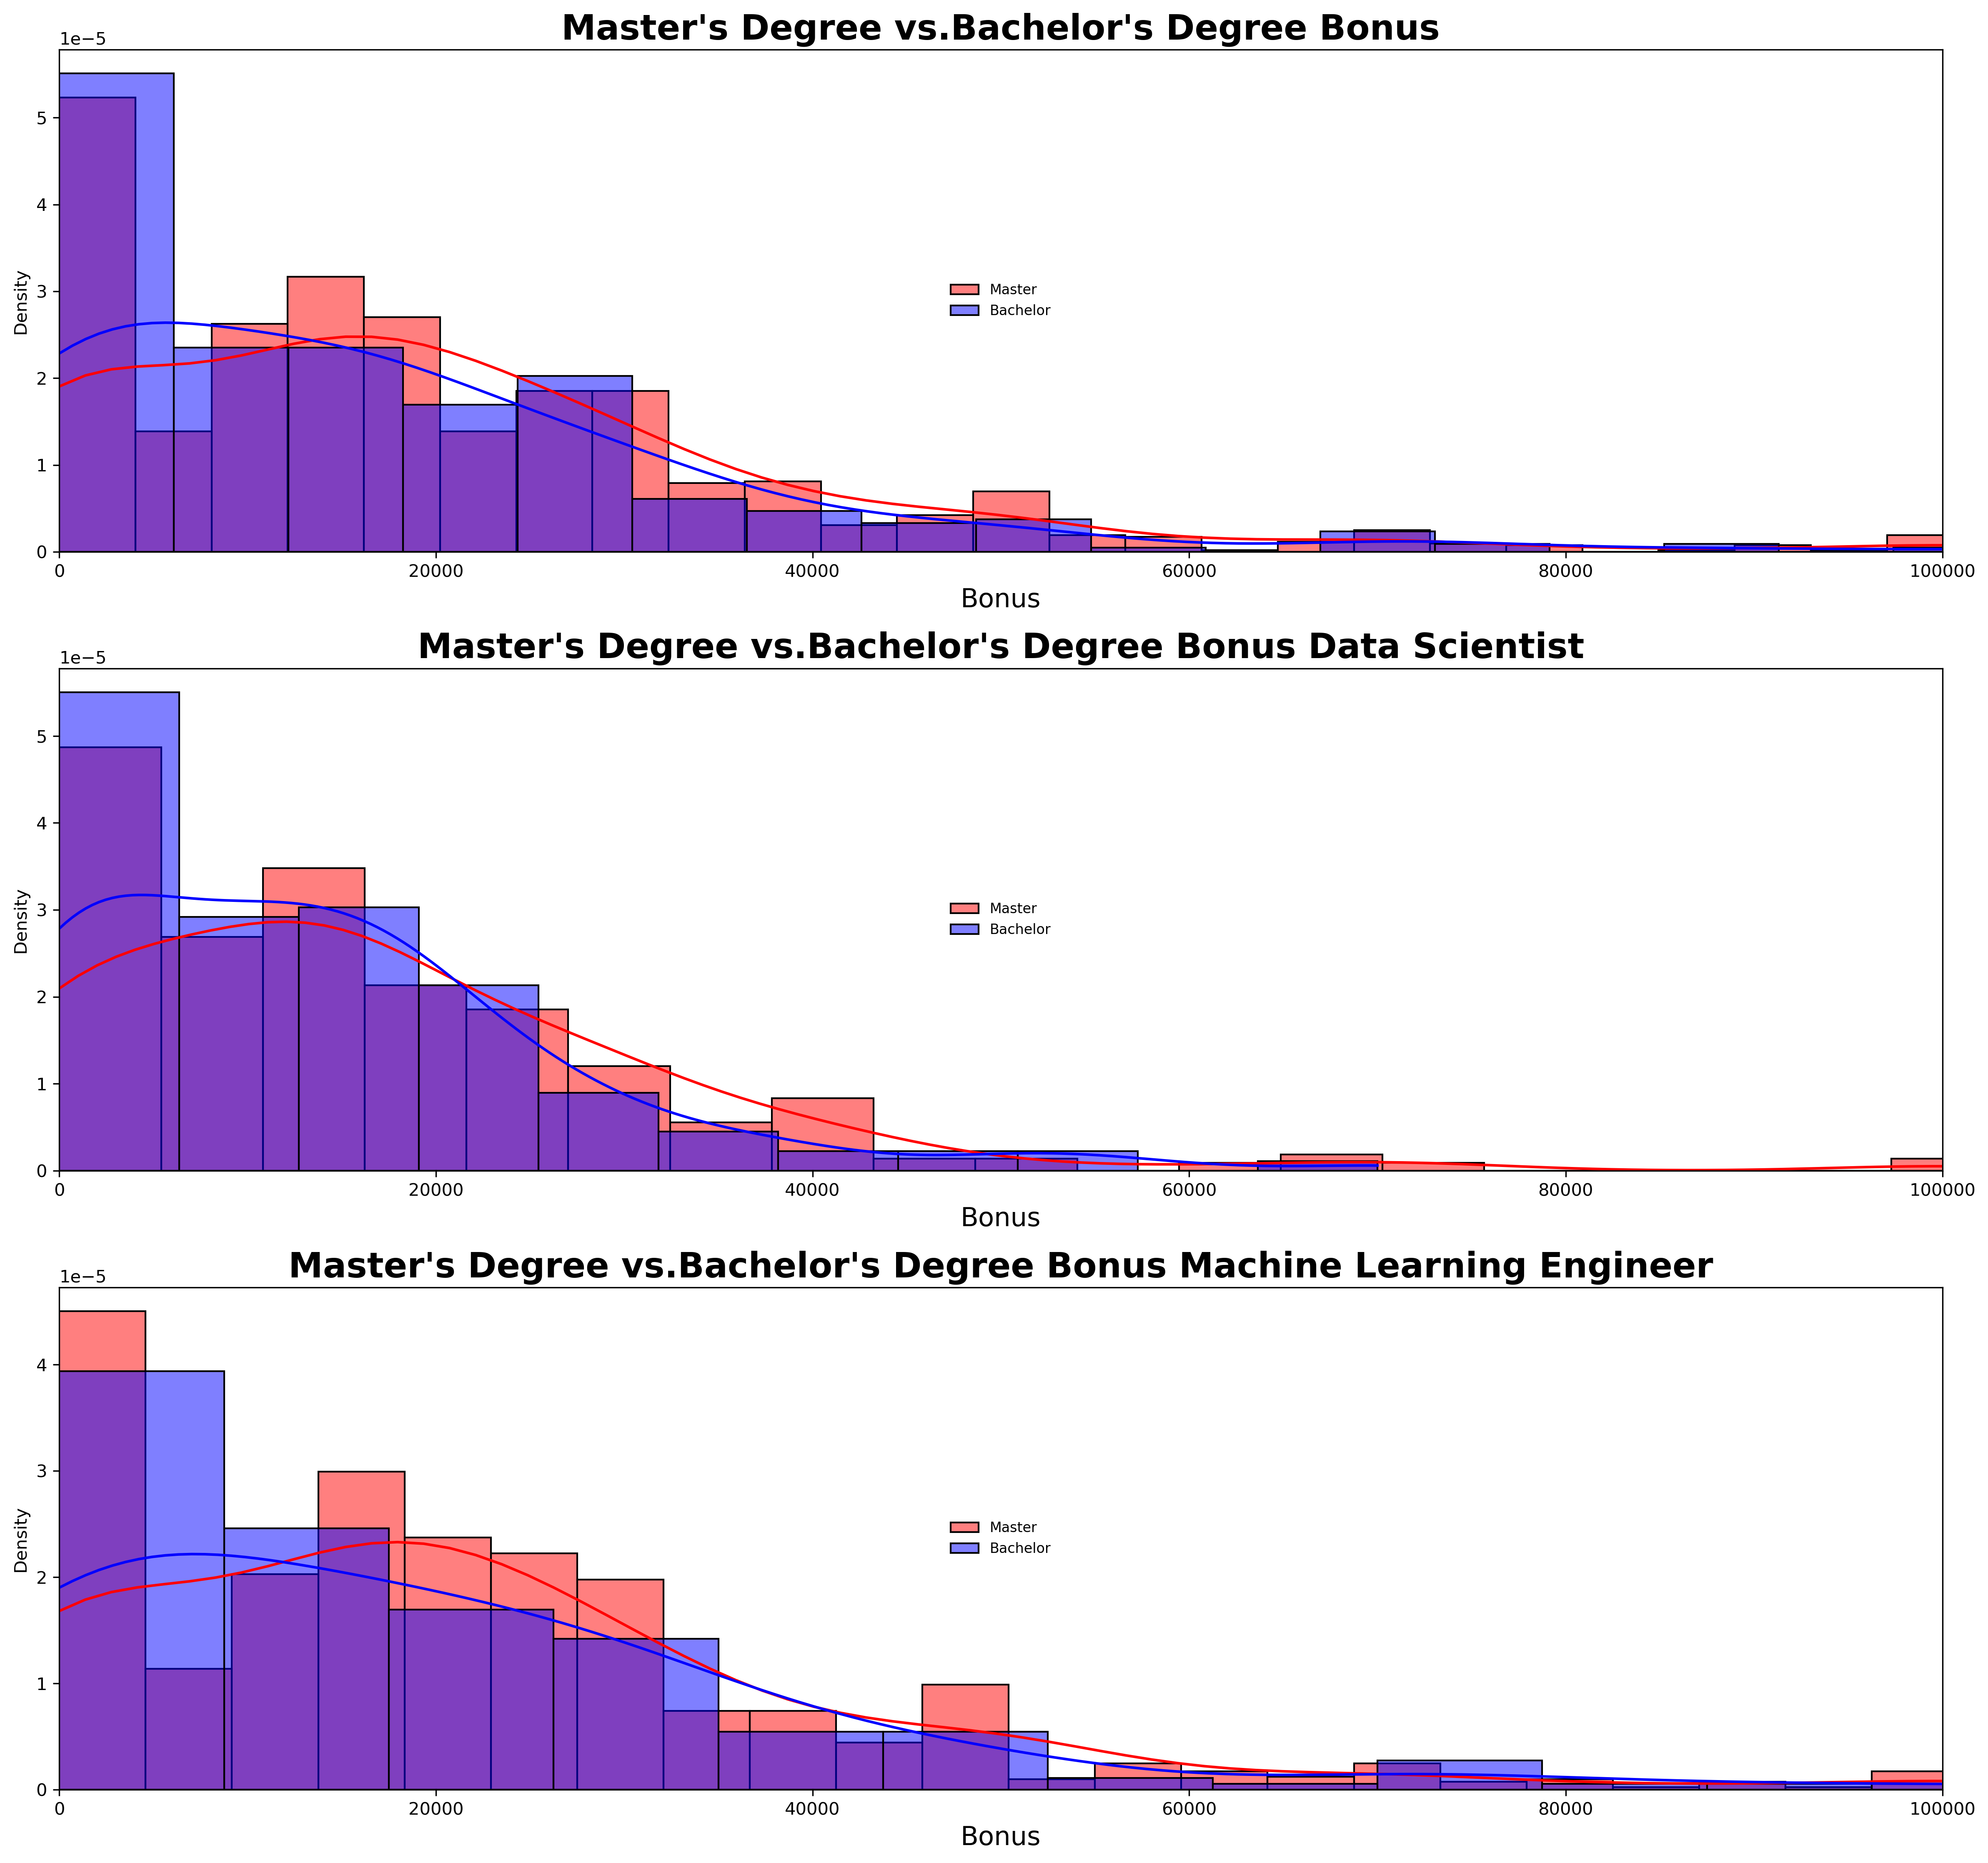

In [58]:


fig, (ax1,ax3, ax5) = plt.subplots(3, 1, figsize=(16,15), dpi=300)
sns.histplot(dfmaster["bonus"], ax=ax1, color="red",  kde=True, stat="density", label='Master', linewidth=1).set(xlim=(0,100000))
sns.histplot(dfbachelor["bonus"], ax=ax1, color="blue", kde=True, stat="density", label='Bachelor',linewidth=1).set(xlim=(0,100000))
ax1.set_title("Master's Degree vs.Bachelor's Degree Bonus", fontweight="bold", color="black", fontsize=20)
ax1.set_xlabel('Bonus', fontsize=15)

sns.histplot(dfmaster_ds["bonus"], ax=ax3, color="red",  kde=True, stat="density",label='Master', linewidth=1).set(xlim=(0,100000))
sns.histplot(dfbachelor_ds["bonus"], ax=ax3, color="blue", kde=True, stat="density", label='Bachelor',linewidth=1).set(xlim=(0,100000))
ax3.set_title("Master's Degree vs.Bachelor's Degree Bonus Data Scientist", fontweight="bold", color="black", fontsize=20)
ax3.set_xlabel('Bonus', fontsize=15)

sns.histplot(dfmaster_ml["bonus"], ax=ax5, color="red",  kde=True, stat="density",label='Master', linewidth=1).set(xlim=(0,100000))
sns.histplot(dfbachelor_ml["bonus"], ax=ax5, color="blue", kde=True, stat="density",label='Bachelor', linewidth=1).set(xlim=(0,100000))
ax5.set_title("Master's Degree vs.Bachelor's Degree Bonus Machine Learning Engineer", fontweight="bold", color="black", fontsize=20)
ax5.set_xlabel('Bonus', fontsize=15)

handles, labels = ax1.get_legend_handles_labels()
handles = [h for h, lbl, prev in zip(handles, labels, [None] + labels) if lbl != prev]
ax1.legend(handles=handles, loc="center", fontsize=8, frameon=False)
handles2, labels2 = ax3.get_legend_handles_labels()
handles2 = [h for h, lbl, prev in zip(handles2, labels2, [None] + labels2) if lbl != prev]
ax3.legend(handles=handles2, loc="center", fontsize=8, frameon=False)
handles3, labels3 = ax5.get_legend_handles_labels()
handles3 = [h for h, lbl, prev in zip(handles3, labels3, [None] + labels3) if lbl != prev]
ax5.legend(handles=handles3, loc="center", fontsize=8, frameon=False)
fig.tight_layout()
plt.show()

count       349.0
mean      54361.0
std       81453.0
min           0.0
25%           0.0
50%       33000.0
75%       70000.0
max      680000.0
Name: stockgrantvalue, dtype: float64

count      1281.0
mean      63839.0
std       86695.0
min           0.0
25%        6000.0
50%       40000.0
75%       85000.0
max      780000.0
Name: stockgrantvalue, dtype: float64

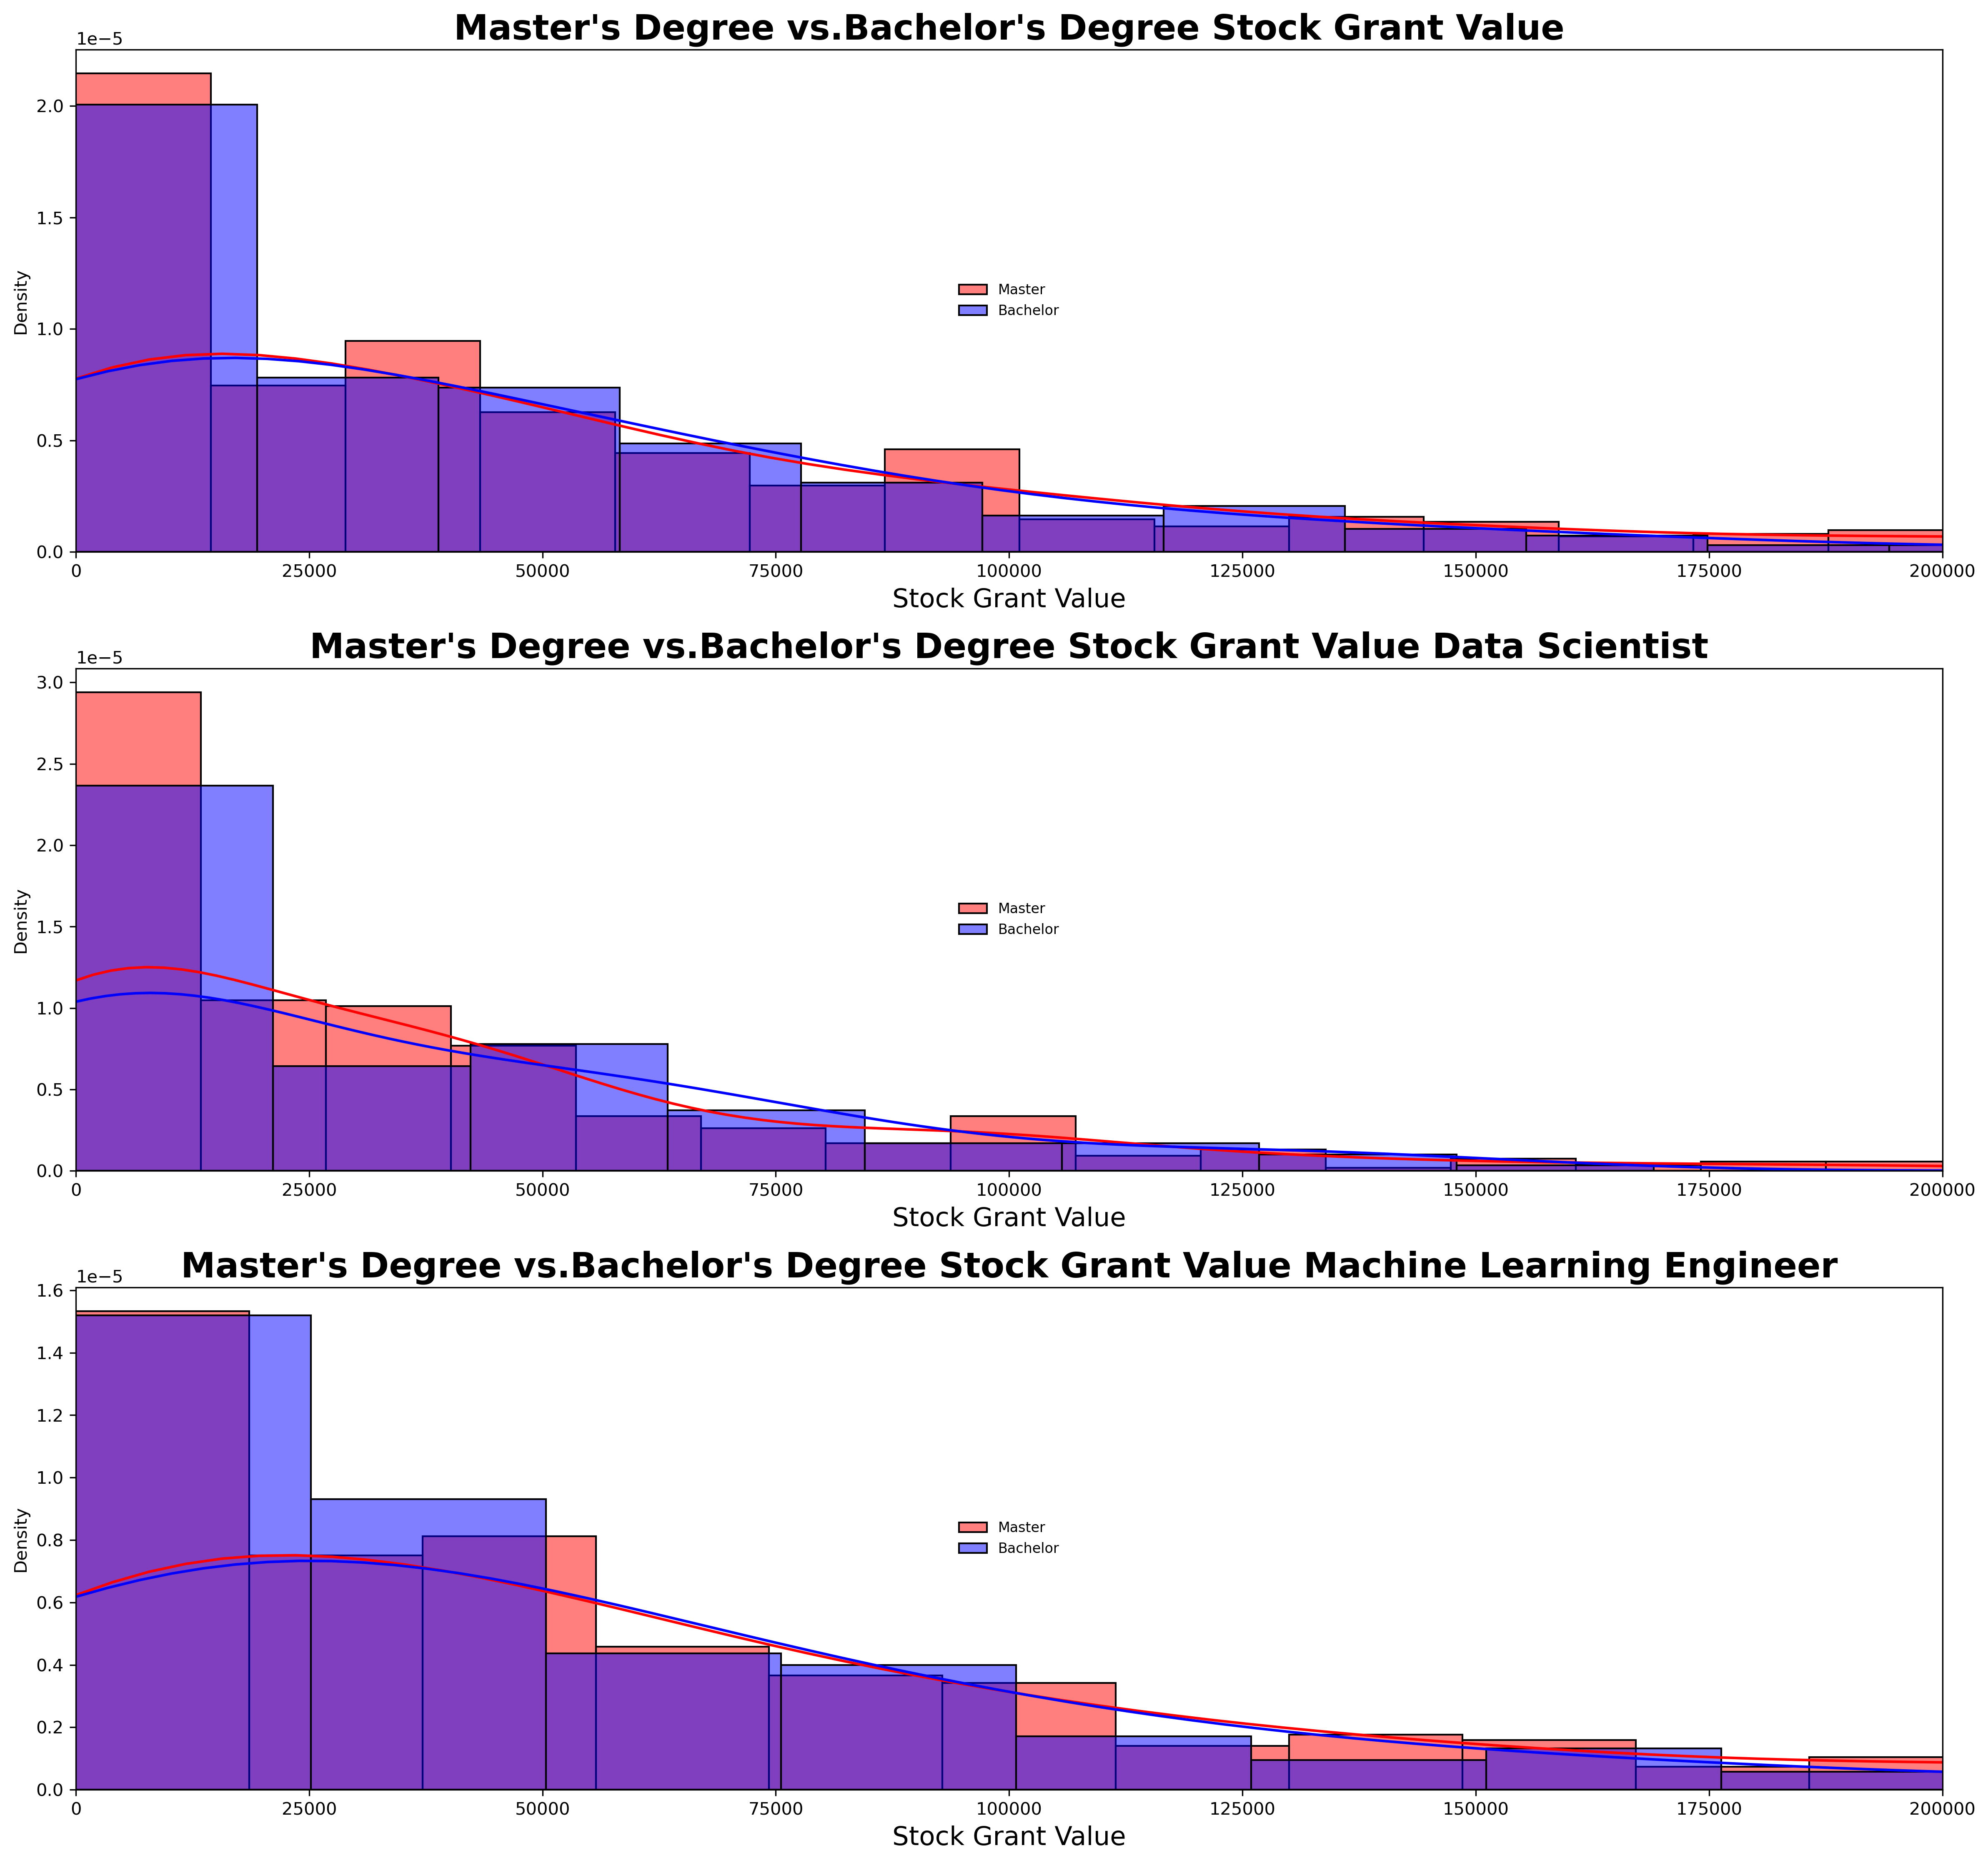

In [59]:

display(dfbachelor.stockgrantvalue.describe().round(0))
display(dfmaster.stockgrantvalue.describe().round(0))


fig, (ax1,ax3, ax5) = plt.subplots(3, 1, figsize=(16,15), dpi=300)
sns.histplot(dfmaster["stockgrantvalue"], ax=ax1, color="red",  kde=True, label='Master',stat="density", linewidth=1).set(xlim=(0,200000))
sns.histplot(dfbachelor["stockgrantvalue"], ax=ax1, color="blue",label='Bachelor', kde=True, stat="density", linewidth=1).set(xlim=(0,200000))
ax1.set_title("Master's Degree vs.Bachelor's Degree Stock Grant Value", fontweight="bold", color="black", fontsize=20)
ax1.set_xlabel('Stock Grant Value', fontsize=15)

sns.histplot(dfmaster_ds["stockgrantvalue"], ax=ax3, color="red",  kde=True, stat="density", label='Master',linewidth=1).set(xlim=(0,200000))
sns.histplot(dfbachelor_ds["stockgrantvalue"], ax=ax3, color="blue",label='Bachelor', kde=True, stat="density", linewidth=1).set(xlim=(0,200000))
ax3.set_title("Master's Degree vs.Bachelor's Degree Stock Grant Value Data Scientist", fontweight="bold", color="black", fontsize=20)
ax3.set_xlabel('Stock Grant Value', fontsize=15)

sns.histplot(dfmaster_ml["stockgrantvalue"], ax=ax5, color="red",label='Master',  kde=True, stat="density", linewidth=1).set(xlim=(0,200000))
sns.histplot(dfbachelor_ml["stockgrantvalue"], ax=ax5, color="blue",label='Bachelor', kde=True, stat="density", linewidth=1).set(xlim=(0,200000))
ax5.set_title("Master's Degree vs.Bachelor's Degree Stock Grant Value Machine Learning Engineer", fontweight="bold", color="black", fontsize=20)
ax5.set_xlabel('Stock Grant Value', fontsize=15)

handles, labels = ax1.get_legend_handles_labels()
handles = [h for h, lbl, prev in zip(handles, labels, [None] + labels) if lbl != prev]
ax1.legend(handles=handles, loc="center", fontsize=8, frameon=False)
handles2, labels2 = ax3.get_legend_handles_labels()
handles2 = [h for h, lbl, prev in zip(handles2, labels2, [None] + labels2) if lbl != prev]
ax3.legend(handles=handles2, loc="center", fontsize=8, frameon=False)
handles3, labels3 = ax5.get_legend_handles_labels()
handles3 = [h for h, lbl, prev in zip(handles3, labels3, [None] + labels3) if lbl != prev]
ax5.legend(handles=handles3, loc="center", fontsize=8, frameon=False)
fig.tight_layout()
plt.show()

For the distribution of bonuses, all show a left skew, as many do not have bonuses. Interestingly, the bonus distribution for Master's machine learning engineers presents a bimodal distribution, which makes it have a larger mean compared to the Bachelor's.
Master's and Bachelor's stock grant value show similar distributions, with barely any difference in mean and variance.

Overall for machine learning engineer and data scientist positions, the total salary distribution for master's degrees has a more significant mean and median and more minor variance than the total salary distribution for bachelor's degrees.

## Analyze the correlation between years of experience and salary for Master's degree and Bachelor's degree
Based on the findings of the second part of the analysis, we wanted to explore whether the salary growth rate of master's degree employees is higher than that of bachelor's degree employees as their work experience increases.

Analysis whether there is a positive linear increase in salary in data science field as the number of years worked increases by using scatter plot and finding the correlation between years of experience and salary.

The Over All Correlation Between Years of Experience and Total Yearly Compensation for Master is: 0.46


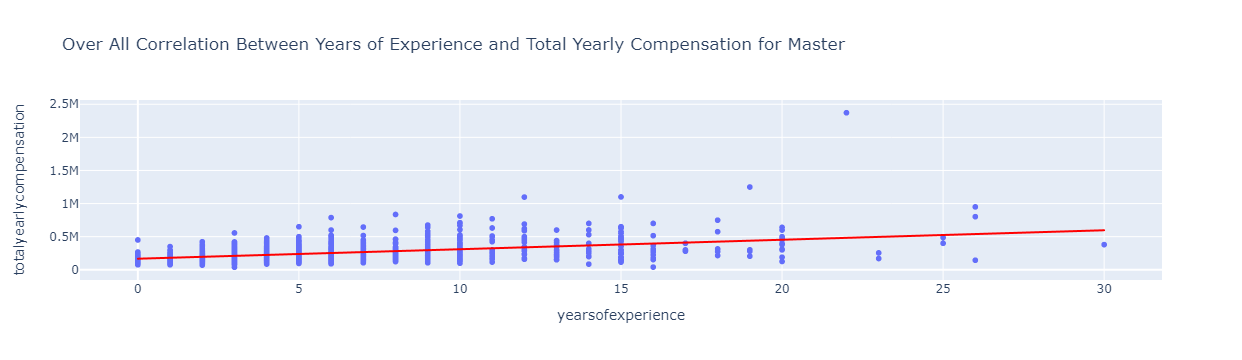

The Over All Correlation Between Years of Experience and Total Yearly Compensation for Bachelor is: 0.51


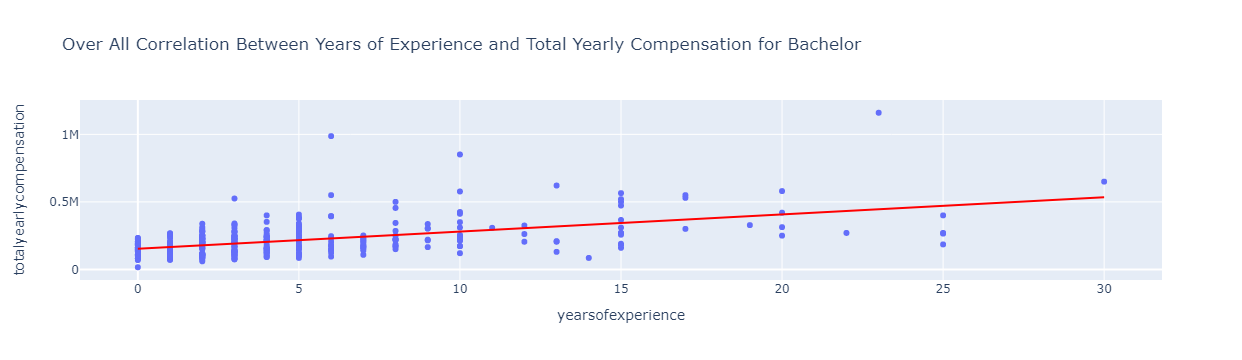

In [60]:
corr_value1 = dfmaster["yearsofexperience"].corr(dfmaster["totalyearlycompensation"])
print(f"The Overall Correlation Between Years of Experience and Total Yearly Compensation for Master is: {corr_value1:.2f}")
fig1 = px.scatter( data_frame=dfmaster, x="yearsofexperience", y="totalyearlycompensation", trendline="ols", trendline_color_override="red",
    title="Overall Correlation Between Years of Experience and Total Yearly Compensation for Master"
)

fig1.show()

corr_value2 = dfbachelor["yearsofexperience"].corr(dfbachelor["totalyearlycompensation"])
print(f"The Overall Correlation Between Years of Experience and Total Yearly Compensation for Bachelor is: {corr_value2:.2f}")
fig2 = px.scatter( data_frame=dfbachelor, x="yearsofexperience", y="totalyearlycompensation", trendline="ols", trendline_color_override="red",
    title="Overall Correlation Between Years of Experience and Total Yearly Compensation for Bachelor")

fig2.show()

Correlation between yearsofexperience and totalyearlycompensation for master Data Scientist is: 0.39


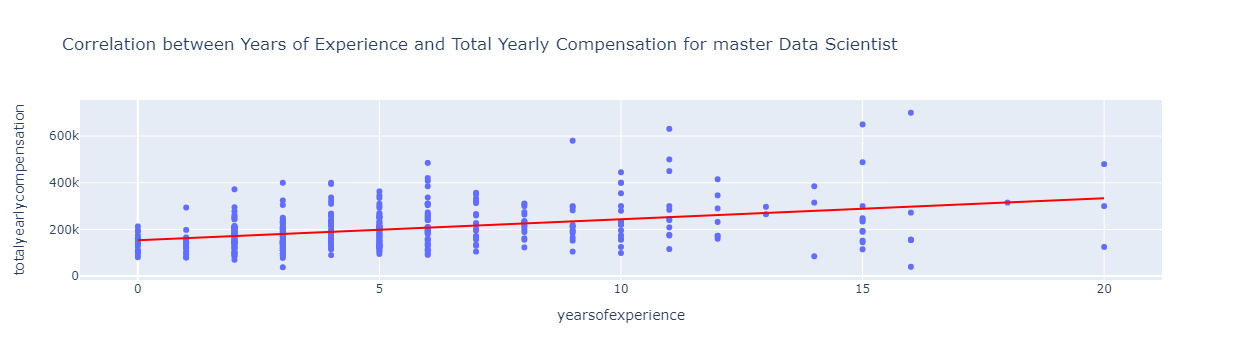

Correlation between yearsofexperience and totalyearlycompensation for bachelor Data Scientist is: 0.43


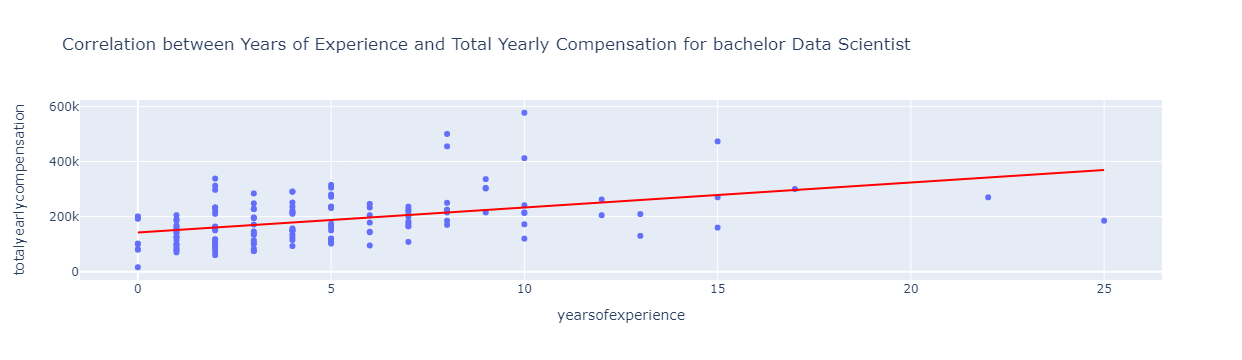

In [61]:
corr_value3 = dfmaster_ds["yearsofexperience"].corr(dfmaster_ds["totalyearlycompensation"])
print(f"Correlation between yearsofexperience and totalyearlycompensation for master Data Scientist is: {corr_value3:.2f}")
fig3 = px.scatter(
    data_frame=dfmaster_ds,x="yearsofexperience", y="totalyearlycompensation", trendline="ols", trendline_color_override="red",
    title="Correlation between Years of Experience and Total Yearly Compensation for master Data Scientist")

fig3.show()

corr_value4 = dfbachelor_ds["yearsofexperience"].corr(dfbachelor_ds["totalyearlycompensation"])
print(f"Correlation between yearsofexperience and totalyearlycompensation for bachelor Data Scientist is: {corr_value4:.2f}")
fig4 = px.scatter( data_frame=dfbachelor_ds, x="yearsofexperience", y="totalyearlycompensation", trendline="ols", trendline_color_override="red",
    title="Correlation between Years of Experience and Total Yearly Compensation for bachelor Data Scientist"
)

fig4.show()

Correlation between yearsofexperience and totalyearlycompensation for Master Machine Learning Engineer is: 0.39


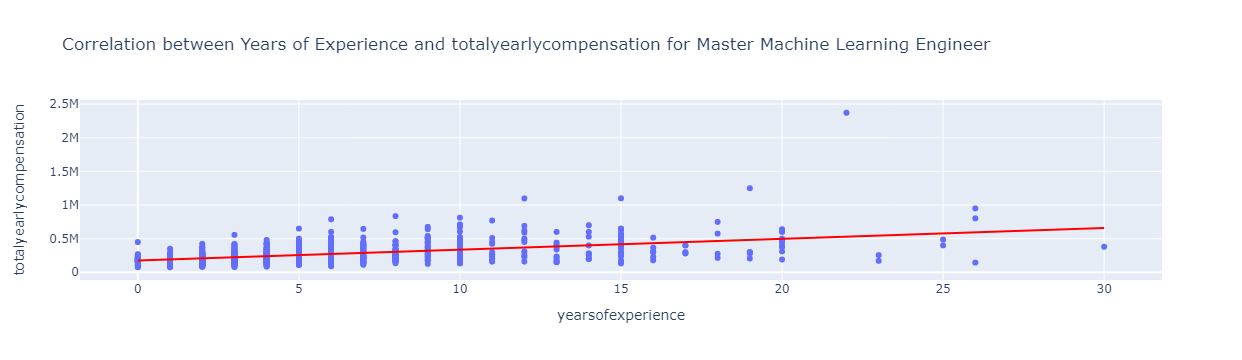

Correlation between yearsofexperience and Total Yearly Compensation for Bachelor Machine Learning Engineer is: 0.43


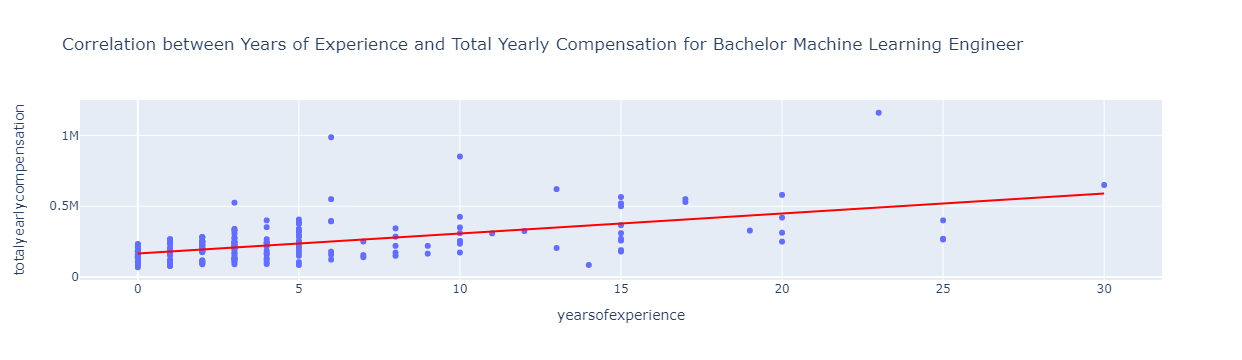

In [62]:
corr_value5 = dfmaster_ml["yearsofexperience"].corr(dfmaster_ml["totalyearlycompensation"])
print(f"Correlation between yearsofexperience and totalyearlycompensation for Master Machine Learning Engineer is: {corr_value3:.2f}")
fig3 = px.scatter( data_frame=dfmaster_ml, x="yearsofexperience", y="totalyearlycompensation", trendline="ols", trendline_color_override="red",
    title="Correlation between Years of Experience and totalyearlycompensation for Master Machine Learning Engineer")

fig3.show()
print(f"Correlation between yearsofexperience and Total Yearly Compensation for Bachelor Machine Learning Engineer is: {corr_value4:.2f}",
)
corr_value6 = dfbachelor_ml["yearsofexperience"].corr(dfbachelor_ml["totalyearlycompensation"])

fig4 = px.scatter( data_frame=dfbachelor_ml, x="yearsofexperience", y="totalyearlycompensation", trendline="ols", trendline_color_override="red",
    title="Correlation between Years of Experience and Total Yearly Compensation for Bachelor Machine Learning Engineer")

fig4.show()

Base on the correlations we find, there is a positive linear relationship between the number of years worked and the salary, which means that the salary will increase with experience.

Based on the linear model generated by plotly, we can see that overall the salary growth rate of masters is higher than that of bachelors. However, we find that in the comparison of data scientist positions the salary growth rate of masters is slightly lower than that of bachelors. We believe this is inaccurate due to the low correlation coefficient of the model.

## Question 3. What role is skill level and programming language playing in data science field?


We can analyze coding experience in different range, programming language and their annual salary:

- Annual average salary within different coding experience ranges
- How important is the programming language

In the first part of our analysis, we look at the annual average salary within different coding experience ranges. Then, we use coding experience as a measurement to see how it affects the salary, usually higher coding experience leads to a higher salary. Next, we will use a capability radar chart to rate the programming skills. Finally, the score is rated by how often people use those programming languages daily.



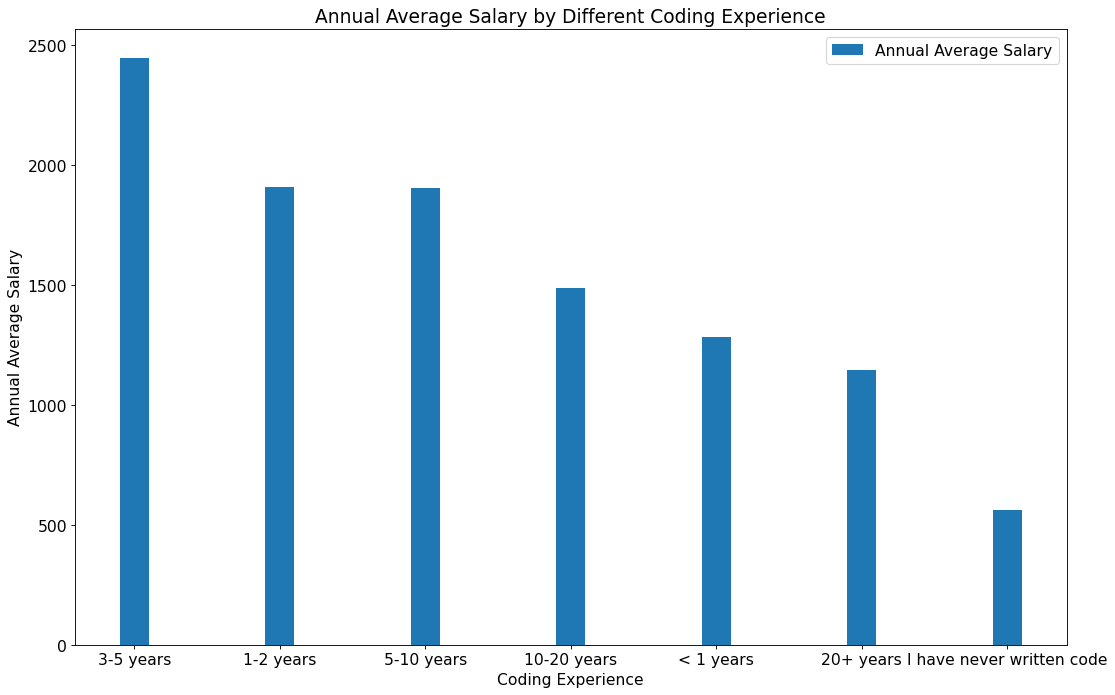

In [66]:
width=0.2
coding_x=dataset['Q6'].value_counts().index
coding_y= dataset['Q6'].value_counts().values.tolist()
plt.figure(figsize=(16,10),dpi=80)
#plt.xticks(arange(len(coding_x)),coding_x)
plt.bar(coding_x,coding_y, width)


#plt.bar(x+0.2, y2, width)
plt.xlabel("Coding Experience") 
plt.ylabel("Annual Average Salary")
plt.title("Annual Average Salary by Different Coding Experience")
plt.legend(["Annual Average Salary"])


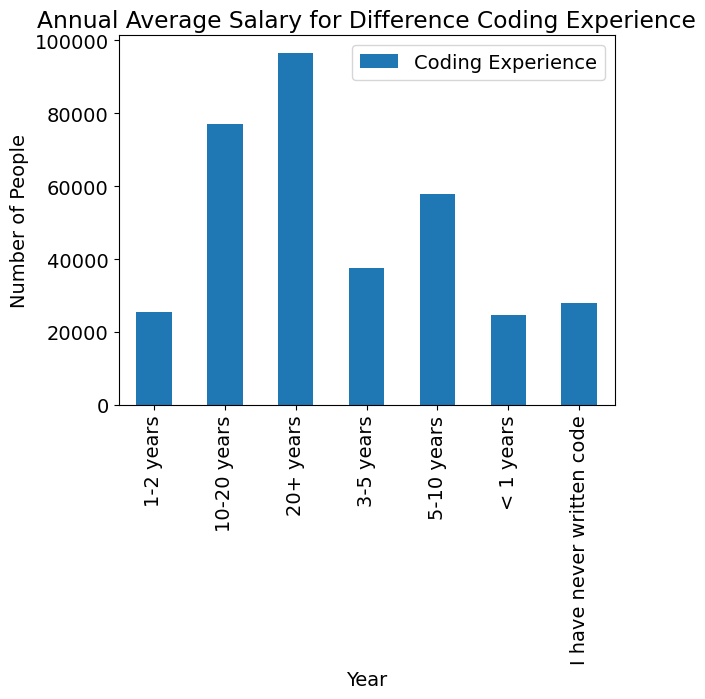

In [67]:
width=0.2
#salary_x=mean_coding["Coding Experience"].index
#salary_b=mean_coding['mean'].values.tolist()

#fig = plt.figure()
mean_coding.plot(kind="bar", title="test")

#plt.bar(x,b, width)

#plt.bar(x+0.2, y2, width)
plt.xlabel("Year") 
plt.ylabel("Number of People")
plt.title("Annual Average Salary for Difference Coding Experience")
plt.legend(["Coding Experience"])



By the bar graph above, we have the number of people who have different coding experiences by different ranges. There are almost 2400 people who have 3-5 years of coding experience. There are also people who have 20+ years of coding experience. Also, there are some people does not have coding experience at all. However, the number of people that have 20+ year or no experience are very low compared to other ranges. Then we can combine the next graph, which is about "Annual Average Salary for Difference Coding Experience." The annual salary for 20+ years is the highest, and it proves how important to have coding experience in Data Science works. If we look back at the 3-5 years range, we can see that their average annual salary is in the middle place compared to other ranges.

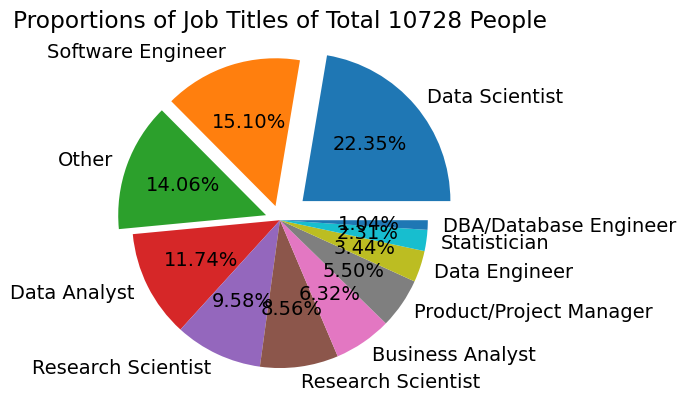

In [68]:

plt.pie(x=number_of_title["Job Title"], #total of 10728
        autopct='%.2f%%',
        labels=["Data Scientist", "Software Engineer", "Other", "Data Analyst", "Research Scientist","Research Scientist","Business Analyst","Product/Project Manager","Data Engineer","Statistician","DBA/Database Engineer"],
        explode=(0.2, 0.1, 0.1, 0, 0,0,0,0,0,0,0)
       )
plt.title("Proportions of Job Titles of Total 10728 People")
plt.show()

The total number of people we have in this dataset is 10728. Therefore, we are using the pie chart to have an idea of the proportions of jobs. The Data Scientist is the majority of job type that we have here, which is 22.35%, flooring by Software Engineer and Data Analyst. There is only 1.04% of people are database engineers. We would like to use more familiar jobs to get an idea of what kind of programming languages people use on a daily basis. We are going to use some more rad graphs to visualize the programming languages base on Data Scientists, Software engineers, and Data Analysts. 

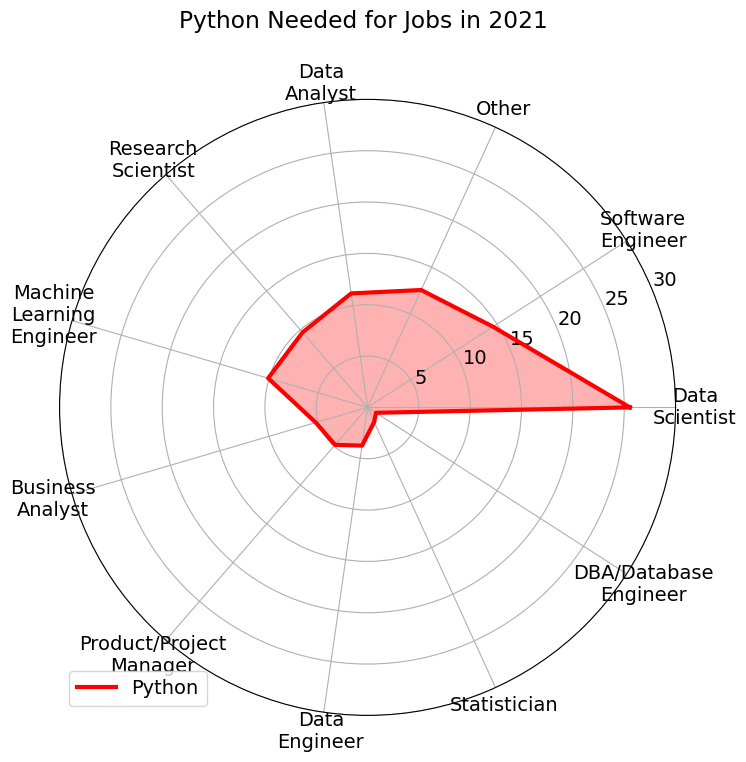

In [69]:
df_needinfo['python'] = df_needinfo['Python'] == 'Python'
temp = df_needinfo.groupby('python')['Job Title'].value_counts().to_frame()
other_color = "red"
blue_color = "skyblue"

temp.columns = ['amount']
temp = temp.reset_index(drop = False)
temp = temp.pivot(index = 'python', columns='Job Title')['amount']


temp['all'] = temp.sum(axis = 1)
for c in temp.columns:
    temp[c] = temp[c] / temp['all'] * 100

temp = temp.drop(['all'], axis = 1)
temp = temp[df_needinfo['Job Title'].value_counts().index]



categories = list([c.replace(' ', '\n') for c in temp.columns])

angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
angles += angles[:1]

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (8, 8), subplot_kw=dict(polar = True))
plt.xticks(angles[:-1], categories)
plt.ylim(0, 30)

values = temp.iloc[0].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, other_color, linewidth = 3, linestyle = 'solid', label = 'Python')
ax.fill(angles, values, other_color, alpha = 0.3)


plt.title('Python Needed for Jobs in 2021 \n')
plt.legend(loc = 'lower left')
plt.show()

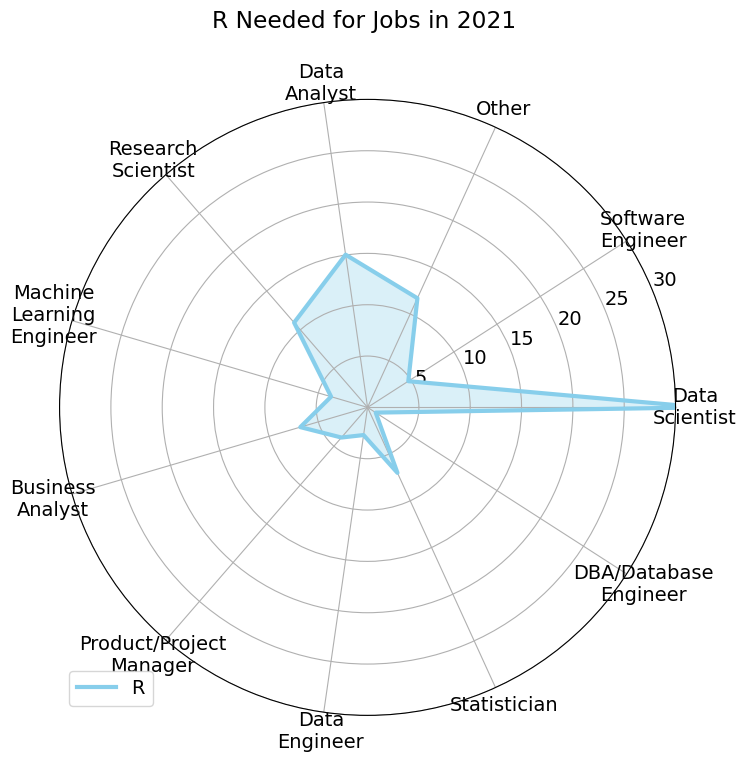

In [70]:
df_needinfo['r'] = df_needinfo['R'] == 'R'
temp = df_needinfo.groupby('r')['Job Title'].value_counts().to_frame()
other_color = "red"
blue_color = "skyblue"

temp.columns = ['amount']
temp = temp.reset_index(drop = False)
temp = temp.pivot(index = 'r', columns='Job Title')['amount']


temp['all'] = temp.sum(axis = 1)
for c in temp.columns:
    temp[c] = temp[c] / temp['all'] * 100

temp = temp.drop(['all'], axis = 1)
temp = temp[df_needinfo['Job Title'].value_counts().index]



categories = list([c.replace(' ', '\n') for c in temp.columns])

angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
angles += angles[:1]

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (8, 8), subplot_kw=dict(polar = True))
plt.xticks(angles[:-1], categories)
plt.ylim(0, 30)

values = temp.iloc[0].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, blue_color, linewidth = 3, linestyle = 'solid', label = 'R')
ax.fill(angles, values, blue_color, alpha = 0.3)


plt.title('R Needed for Jobs in 2021 \n')
plt.legend(loc = 'lower left')
plt.show()

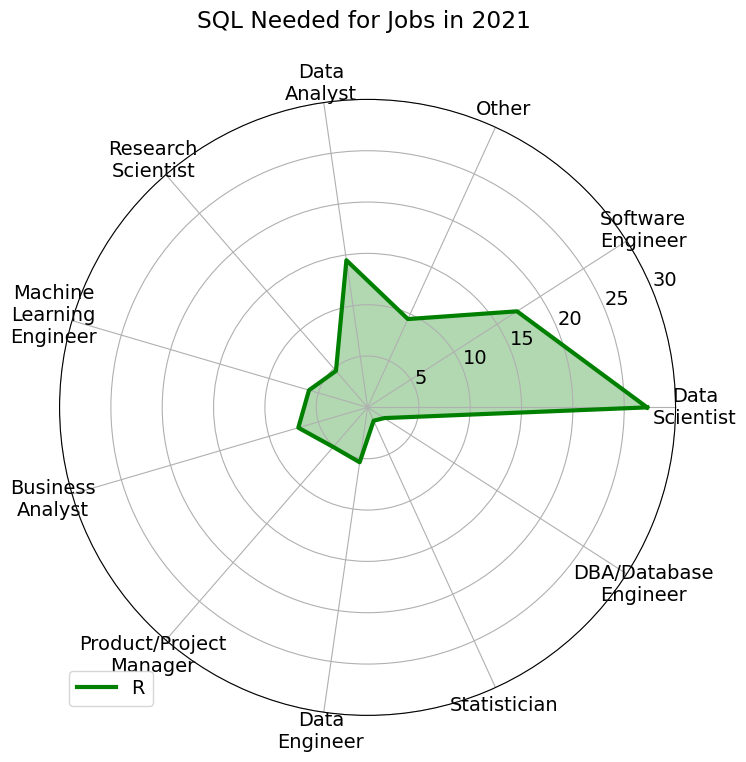

In [71]:
df_needinfo['sql'] = df_needinfo['SQL'] == 'SQL'
temp = df_needinfo.groupby('sql')['Job Title'].value_counts().to_frame()
other_color = "red"
green_color = "green"

temp.columns = ['amount']
temp = temp.reset_index(drop = False)
temp = temp.pivot(index = 'sql', columns='Job Title')['amount']


temp['all'] = temp.sum(axis = 1)
for c in temp.columns:
    temp[c] = temp[c] / temp['all'] * 100

temp = temp.drop(['all'], axis = 1)
temp = temp[df_needinfo['Job Title'].value_counts().index]



categories = list([c.replace(' ', '\n') for c in temp.columns])

angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
angles += angles[:1]

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (8, 8), subplot_kw=dict(polar = True))
plt.xticks(angles[:-1], categories)
plt.ylim(0, 30)

values = temp.iloc[0].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, green_color, linewidth = 3, linestyle = 'solid', label = 'R')
ax.fill(angles, values, green_color, alpha = 0.3)


plt.title('SQL Needed for Jobs in 2021 \n')
plt.legend(loc = 'lower left')
plt.show()

A capability radar chart can display capability values. So we choose to use radar charts as our visual tool to show the programming languages that different occupations use in their daily work. From the pie chart, we can see that Data Scientist and Software Engineer are the top two positions. Combien with the radar chart, the full score for each programming language is 30. We can know what programming languages are used by workers in the data science field through the level of scores. First, we can see that almost all data scientists use Python, R, and SQL languages as their problem-solving tools because all the score is higher than 25. Few software engineers use R, and the score is at 5. 

After the visualizations, we can conclude that know the right programming language and gain coding experience is important. Both of them can help you find a job in the data science field. At the same time, having longer coding experience and strong programming ability also helps people get higher salaries.

## OVERALL CONCLUSION AND FINDINGS



There are many ways to determine whether employment has potential. We use a relatively intuitive concept of salary to analyze whether data science employment is growing by collecting questionnaires from the data science industry. However, the level of wages will be affected by many factors. So we analyzed and visualized some of these factors.
- Data Scientists and Data Engineers are consistently hot professions in our analytics, and Data Scientists have the highest average salary in the data science field. However, all jobs had salary increases from 2020 to 2022. 
- The data shows that although the proportion of women in the data science industry is only 20%, this does not affect the salary. So there is no gender difference in salary.
- Master's degree employees have the highest percentage of data science employees in the U.S., with more than half of data scientists holding a master's degree.
- The distribution of yearly salaries for holders of master's degrees has a more significant mean and median and smaller variance than the distribution of yearly salaries for holders of bachelor's degrees in the U.S.
- The salary growth rate for data science professionals with a master's degree will be higher than for those with a bachelor's degree as they gain more work experience.
- If the job seeker's purpose is to find a high-salary job, through our analysis, we will recommend acquiring more coding experience and proficiency in some programming languages. Before we started our analysis, we assumed that salaries would increase as people had longer coding experience. From the results, our assumption was confirmed. More coding experience equals a higher salary. We also recommend proficiency in some programming languages. For example, if you want a job as a Data Scientist, you need to be proficient in Python, R, and SQL. By calculation, they are tools that data scientists use every day.

We still think that data science field have opportunities for job seekers, and there are some potentials in future growth. Hopefully, through the use of our visuals, job seekers or people planning to make career switch to know the employment market better and make informed decisions.

## Data Reliability
One of our dataset was from ai-jobs Salary. It is a professional data collection site and are all about data science and machine learning. The website will provide the collected data for people to download for research or study and to understand the data science field. In this regard, we have the same purpose.


## Data Limitation

**1. Information accuratce.**

Because we are using the survey dataset, keep in mind that people don’t always provide accurate information.

**2. The data sample is limited.**
The most accurate result usually requires a huge dataset. The result would not be affected by missing value or extreme value.




## References
BHATIA, R., 2022. Data Science Job Salaries. [online] Kaggle.com. Available at: <https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries?resource=download> [Accessed 18 September 2022].  

Kaggle.com. 2022. 2021 Kaggle Machine Learning & Data Science Survey. [online] Available at: <https://www.kaggle.com/competitions/kaggle-survey-2021/overview> [Accessed 18 September 2022].  
https://salaries.ai-jobs.net/

r_beginner (2022) Stackoverflow. Available at: https://stackoverflow.com/questions/72675717/plotly-choropleth-shows-color-for-us-and-not-other-countries

Kaggle Survey 2021 : South Korea. Available at: https://www.kaggle.com/code/kalelpark/kaggle-survey-2021-south-korea

STEM Income Disparity: Does it exist? Available at:https://www.kaggle.com/code/jonbown/stem-income-disparity-does-it-exist/notebook